In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
dataset_path_1st = '/home/mongoose01/mongooseai/data/cms/open_source/IMS/1st_test'
dataset_path_2nd = '/home/mongoose01/mongooseai/data/cms/open_source/IMS/2nd_test/2nd_test'
dataset_path_3rd = '/home/mongoose01/mongooseai/data/cms/open_source/IMS/3rd_test/4th_test/txt'

Bearing1_1_1 = []
Bearing1_2_1 = []
Bearing1_3_2 = []
Bearing1_4_2 = []
Bearing1_5_3 = []
Bearing1_6_3 = []
Bearing1_7_4 = []
Bearing1_8_4 = []
Bearing2_1_1 = []
Bearing2_2_2 = []
Bearing2_3_3 = []
Bearing2_4_4 = []
Bearing3_1_1 = []
Bearing3_2_2 = []
Bearing3_3_3 = []
Bearing3_4_4 = []

for i,csv in enumerate(sorted(os.listdir(dataset_path_1st))):
    df = pd.read_csv(os.path.join(dataset_path_1st, csv),header = None ,sep='\t')
    df["time_after_start"] = i
    Bearing1_1_1.append(df.iloc[:,[0]])
    Bearing1_3_2.append(df.iloc[:,[2]])
    Bearing1_5_3.append(df.iloc[:,[4]])
    Bearing1_7_4.append(df.iloc[:,[6]])

set_1 = [Bearing1_1_1, Bearing1_3_2, Bearing1_5_3, Bearing1_7_4 ]
        
for i,csv in enumerate(sorted(os.listdir(dataset_path_2nd))):
    df = pd.read_csv(os.path.join(dataset_path_2nd, csv),header = None ,sep='\t')
    df["time_after_start"] = i
    Bearing2_1_1.append(df.iloc[:,[0]])
    Bearing2_2_2.append(df.iloc[:,[1]])
    Bearing2_3_3.append(df.iloc[:,[2]])
    Bearing2_4_4.append(df.iloc[:,[3]])
set_2 = [Bearing2_1_1, Bearing2_2_2, Bearing2_3_3, Bearing2_4_4 ]
        

for i,csv in enumerate(sorted(os.listdir(dataset_path_3rd))):
    df = pd.read_csv(os.path.join(dataset_path_3rd, csv),header = None ,sep='\t')
    df["time_after_start"] = i
    Bearing3_1_1.append(df.iloc[:,[0]])
    Bearing3_2_2.append(df.iloc[:,[1]])
    Bearing3_3_3.append(df.iloc[:,[2]])
    Bearing3_4_4.append(df.iloc[:,[3]])
set_3 = [Bearing3_1_1, Bearing3_2_2, Bearing3_3_3, Bearing3_4_4 ]



In [3]:
import pandas as pd
#import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy import signal
#from scipy.signal import iirnotch
#from scipy.signal import hilbert
from scipy import integrate
from scipy.stats import skew, kurtosis
#from sklearn.preprocessing import normalize
import numpy as np
import math
#import pandas as pd


## signal information 
#fq = 8192            # Sampling frequency(=sampling rate)                    
#T = 1/fq            # Sampling period       
#L = 8192*4             # Length of signal 
#t = [i*T for i in range(0,L)]      # Time vector

## import data 
#acc_ts_4s =pd.read_csv('/Users/duyeonee/Google Drive/2019-2/HKTire/data/4s/2019-10-02 KP A3_M_GEAR_4th ACC TIME.csv').Series0.to_numpy()
#acc_sp_4s =pd.read_csv('/Users/duyeonee/Google Drive/2019-2/HKTire/data/4s/2019-10-02 KP A3_M_GEAR_4th ACC SPECTRUM.csv').Series0.to_numpy()
#vel_ts_4s =pd.read_csv('/Users/duyeonee/Google Drive/2019-2/HKTire/data/4s/2019-10-02 KP A3_M_GEAR_4th VEL TIME.csv').Series0.to_numpy()
#vel_sp_4s =pd.read_csv('/Users/duyeonee/Google Drive/2019-2/HKTire/data/4s/2019-10-02 KP A3_M_GEAR_4th VEL SPECTRUM.csv').Series0.to_numpy()

## under 10Hz frequency values => 0 
#accfft_4s = accFFT(acc_ts_4s,L)
#for i in range(9):
#    accfft_4s[i] = 0 
#acc_sp_4s_self = accSpectrum(accfft_4s,L)
#vel_ts_4s_self = velTimebase(accfft_4s,fq,L)

# Integrate accelerometer data and high pass filter 
#vel_ts_4s_our = integrate.cumtrapz(acc_ts_4s)
#vel_ts_4s_our_norm_hp = butter_highpass_filter(vel_ts_4s_our,25,fq)


# Get acceleration FFT value 
def accFFT(acc_timebase, L):
    # normalize 
    acc_mean = np.mean(acc_timebase)
    acc_norm = [i - acc_mean for i in acc_timebase]

    # adjust hamming window 
    #w = get_window('hamming', L)
    w = get_window('hann', L)
    acc_window = acc_norm * w
    acc_fft = np.fft.fft(acc_window)  # fft

    return acc_fft

# convert acceleration time series data to accleration spectrum
def accSpectrum(acc_fft, L):
    # get spectrum magnitude
    acc_fft_mag = np.abs(acc_fft / L)[:int(L / 2 + 1)]  
    #acc_spectrum = [i * 4 for i in acc_fft_mag]
    acc_spectrum = [i * 2 for i in acc_fft_mag]

    return acc_spectrum

def accRMS(acc_timebase, time_step , p2p):
    sampling_rate = 20480
    signal_len = 20480 * time_step              # Length of signal 

    acc_fft = accFFT(acc_timebase, signal_len)
    acc_spectrum = accSpectrum(acc_fft, signal_len)
    acc_spectrum_double = []
    acc_spectrum_double_squared = []

    for i in range(0, int(signal_len / 2)) :
        spectrum_double = 2 * acc_spectrum[i]
        acc_spectrum_double.append(spectrum_double)
        acc_spectrum_double_squared.append(pow(spectrum_double,2))

    AccMS = sum(acc_spectrum_double_squared) / 1.5;
    Arms = math.sqrt(AccMS) * 0.707;

    vel_spectrum_double = []
    vel_spectrum_double_squared = []
    vel_spectrum = velSpectrum(acc_fft, sampling_rate, signal_len)

    for i in range(0, 3) :
        vel_spectrum[i] = 0.0

    for i in range(0, int(signal_len / 2)) :
        spectrum_double = 2 * vel_spectrum[i]
        vel_spectrum_double.append(spectrum_double)
        vel_spectrum_double_squared.append(pow(spectrum_double,2))

    VelMS = sum(vel_spectrum_double_squared) / 1.5;
    Vrms = math.sqrt(VelMS) * 0.707;

    cf = (p2p / 2) / Arms

    return Arms, Vrms, cf

# convert acceleration FFT to velocity spectrum 
def velSpectrum(acc_fft, fq, L):
    # omega arithmetic (v=v'/2pi*i*f)
    # 9806.65
    vel_fft = np.array([i[1] / (2 * np.pi * 1j * (i[0] + 1)) * 9806.65 for i in enumerate(acc_fft)])
    vel_fft_mag = np.abs(vel_fft / L)[:int(L / 2 + 1)]
    #spectrum_vel = [i * 16 for i in vel_fft_mag]
    spectrum_vel = [i * 2 for i in vel_fft_mag]

    return spectrum_vel

# convert acceleration FFT to velocity time series  
def velTimebase(acc_fft,fq,L):
    # omega arithmetic 
    # acc fft -> velocity fft
    vel_fft = np.array([i[1] / (2 * np.pi * 1j  * (i[0] + 1)) * 9806.65 for i in enumerate(acc_fft)])
    # ifft 
    vel_ifft = np.fft.ifft(vel_fft)
    # inverse hamming window 
    #w = get_window('hamming',L)
    w = get_window('hann',L)
    vel_timebase = vel_ifft / w
    
    #vel_mag_double = [i for i in vel_timebase.real]
    vel_mag_double = vel_timebase
    return [i*4 for i in vel_mag_double]

# high pass filter 
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Zero Crossing Rate (ZCR) 계산 함수
def zero_crossing_rate(signal):
    """
    Calculate Zero Crossing Rate (ZCR) of a signal for batch.

    """
    zcr = np.sum(np.diff(np.sign(signal)) != 0) / (2 * len(signal))
    return zcr


# Shape Factor 계산 함수
def calculate_shape_factor(data):
    """
    Calculate Shape Factor for each batch.

    """
    rms = np.sqrt(np.mean(data**2))
    absolute_sum = np.sum(np.abs(data))
    shape_factor = rms * len(data) / absolute_sum
    return shape_factor

# Impulse Factor 계산 함수
def calculate_impulse_factor(data):
    """
    Calculate Impulse Factor for each batch.

    """
    rms = np.sqrt(np.mean(data**2))
    peak_value = np.max(np.abs(data))
    impulse_factor = peak_value * len(data) / np.sum(np.abs(data))
    return impulse_factor

def outlier_counts(inputs, outlier_threshold = 4):
    """
    Detect outliers in a numpy array based on the provided threshold.

    Parameters:
    inputs (numpy.ndarray): The input array.
    outlier_threshold (float): The threshold for determining outliers.

    Returns:
    numpy.ndarray: An array indicating the number of outliers in each row.
    """
    # Calculate the mean and standard deviation along the specified dimension
    mean = np.mean(inputs)
    std = np.std(inputs)

    # Determine outliers
    outliers = np.abs(inputs - mean) > outlier_threshold * std

    # Sum the number of outliers for each row
    outlier_count = np.sum(outliers.astype(int))

    return outlier_count
def calculate_entropy(signal, num_bins = 100):
    """
    Calculate the entropy of a 1D numpy array.

    Parameters:
    signal (numpy.ndarray): The input signal (1D numpy array).
    num_bins (int): The number of bins to use in the histogram.

    Returns:
    float: The entropy of the signal.
    """
    # Calculate bin edges
    min_val = signal.min()
    max_val = signal.max()
    bin_width = (max_val - min_val) / num_bins

    # Calculate histogram indices
    hist_indices = ((signal - min_val) / bin_width).astype(int)
    hist_indices = np.clip(hist_indices, 0, num_bins - 1)

    # Count occurrences of each bin index
    hist_counts, _ = np.histogram(signal, bins=num_bins, range=(min_val, max_val))

    # Normalize histogram
    histograms = hist_counts / sum(hist_counts)

    # Calculate entropy
    entropy = -np.sum(histograms * np.log2(histograms + 1e-10))

    return entropy
def calculate_sinusoidality(signal):
    """
    Calculate the sinusoidality of a 1D numpy array signal.

    Parameters:
    signal (numpy.ndarray): The input signal (1D numpy array).

    Returns:
    float: The sinusoidality of the signal.
    """
    # 신호의 푸리에 변환 수행
    fft_result = np.fft.fft(signal)
    
    # 주파수 성분의 절대값 계산
    fft_magnitude = np.abs(fft_result)
    
    # 주파수 성분의 가장 높은 값을 찾고, 전체 합으로 나눔
    max_magnitude = np.max(fft_magnitude)
    total_magnitude = np.sum(fft_magnitude)

    # 사인성 계산 (주파수 성분 중 최댓값이 전체의 얼마나 되는지 비율로 표현)
    sinusoidality = max_magnitude / total_magnitude

    return sinusoidality

def simple_statistics(data):
    mean = np.mean(data)
    max = np.max(data)
    min = np.min(data)
    skewness = skew(data)
    kurto = kurtosis(data)
    range = max - min
    accrms, vrms, crest = accRMS(data,time_step = 1,p2p = range)
    return np.stack([mean, max, min, skewness, kurto, range, accrms, vrms, crest],axis = -1)
def calculate_rms(signal):
    """
    Calculate the Root Mean Square (RMS) of a 1D numpy array (signal).

    Parameters:
    signal (numpy.ndarray): The input signal (1D numpy array).

    Returns:
    float: The RMS value of the signal.
    """
    return np.sqrt(np.mean(np.square(signal)))

def time_domain_statistic(data):
    rms = calculate_rms(data).reshape(-1,1)
    simple_stats = simple_statistics(data).reshape(-1,9)
    sinusoidality = calculate_sinusoidality(data).reshape(-1,1)
    entropy = calculate_entropy(data).reshape(-1,1)
    outlier_count = outlier_counts(data).reshape(-1,1)
    shape_factor = calculate_shape_factor(data).reshape(-1,1)
    impulse_factor = calculate_impulse_factor(data).reshape(-1,1)
    zcr = zero_crossing_rate(data).reshape(-1,1)

    return np.concatenate([simple_stats, rms, sinusoidality,entropy,outlier_count,shape_factor, impulse_factor, zcr],axis = -1)


def frequency_domain_statistic(data, fs = 20480):
    # 주파수 스펙트럼과 파워 스펙트럼 계산
    frequencies, power_spectrum = signal.periodogram(data, fs)

    # 1. 주파수 스펙트럼의 최대값
    max_power = np.max(power_spectrum)

    # 2. 주파수 스펙트럼의 최소값
    min_power = np.min(power_spectrum)

    # 3. 표준편차
    std_dev = np.std(power_spectrum)

    # 4. 최대 주파수 위치
    max_power_frequency = frequencies[np.argmax(power_spectrum)]

    # 5. 피크 수
    # 스펙트럼 평균보다 5 * 표준편차만큼 높은 피크를 찾음
    peaks, _ = signal.find_peaks(power_spectrum, height=np.mean(power_spectrum) + 5 * std_dev)
    num_peaks = len(peaks)

    # 6. 피크 대 평균 비율
    # 피크의 평균값과 전체 스펙트럼의 평균값의 비율
    peak_to_average_ratio = np.mean(power_spectrum[peaks]) / np.mean(power_spectrum)

    # 7. 스펙트럼 기울기
    # 주파수 스펙트럼의 선형 회귀를 통해 기울기 계산
    slope = np.polyfit(frequencies, power_spectrum, 1)[0]

    # 데이터의 왜도 (비대칭도) 계산
    skewness = skew(power_spectrum)

    # 데이터의 첨도 (뾰족한 정도) 계산
    kurto = kurtosis(power_spectrum)
    
    return np.stack([max_power, min_power, std_dev, max_power_frequency, num_peaks, peak_to_average_ratio, slope, skewness, kurto], axis = -1).reshape(1,-1)

import pandas as pd

# ... [other function definitions remain the same] ...

def total_statistic(data_list):
    # Define column names
    columns = ['Mean', 'Max', 'Min', 'Skewness', 'Kurtosis', 'Range',
               "AccRms", "VRMS", "Crest","RMS", 
               'Sinusoidality', 'Entropy', 'Outlier_Count', 'Shape_Factor', 
               'Impulse_Factor', 'ZCR', 'Max_Power', 'Min_Power', 
               'Std_Dev', 'Max_Power_Frequency', 'Num_Peaks', 
               'Peak_to_Average_Ratio', 'Slope', 'Spectrum_Skewness', 
               'Spectrum_Kurtosis']

    # List to hold DataFrame rows
    rows = []

    # Loop through each data array in the list
    for data in data_list:
        time_domain = time_domain_statistic(np.array(data).reshape(-1,))
        freq_domain = frequency_domain_statistic(np.array(data).reshape(-1,))

        all_stats = np.concatenate([time_domain, freq_domain], axis=-1).reshape(-1,)

        # Append the result as a new row in the list
        rows.append(pd.DataFrame([all_stats], columns=columns))

    # Concatenate all rows into a single DataFrame
    result_df = pd.concat(rows, ignore_index=True)

    return result_df

# Example usage
# Bearing1_7_4 = [list_of_data_arrays]
# result = total_statistic(Bearing1_7_4)
# print(result)


In [13]:
a = total_statistic(Bearing1_7_4[:-10])
#Bearing3_3_3

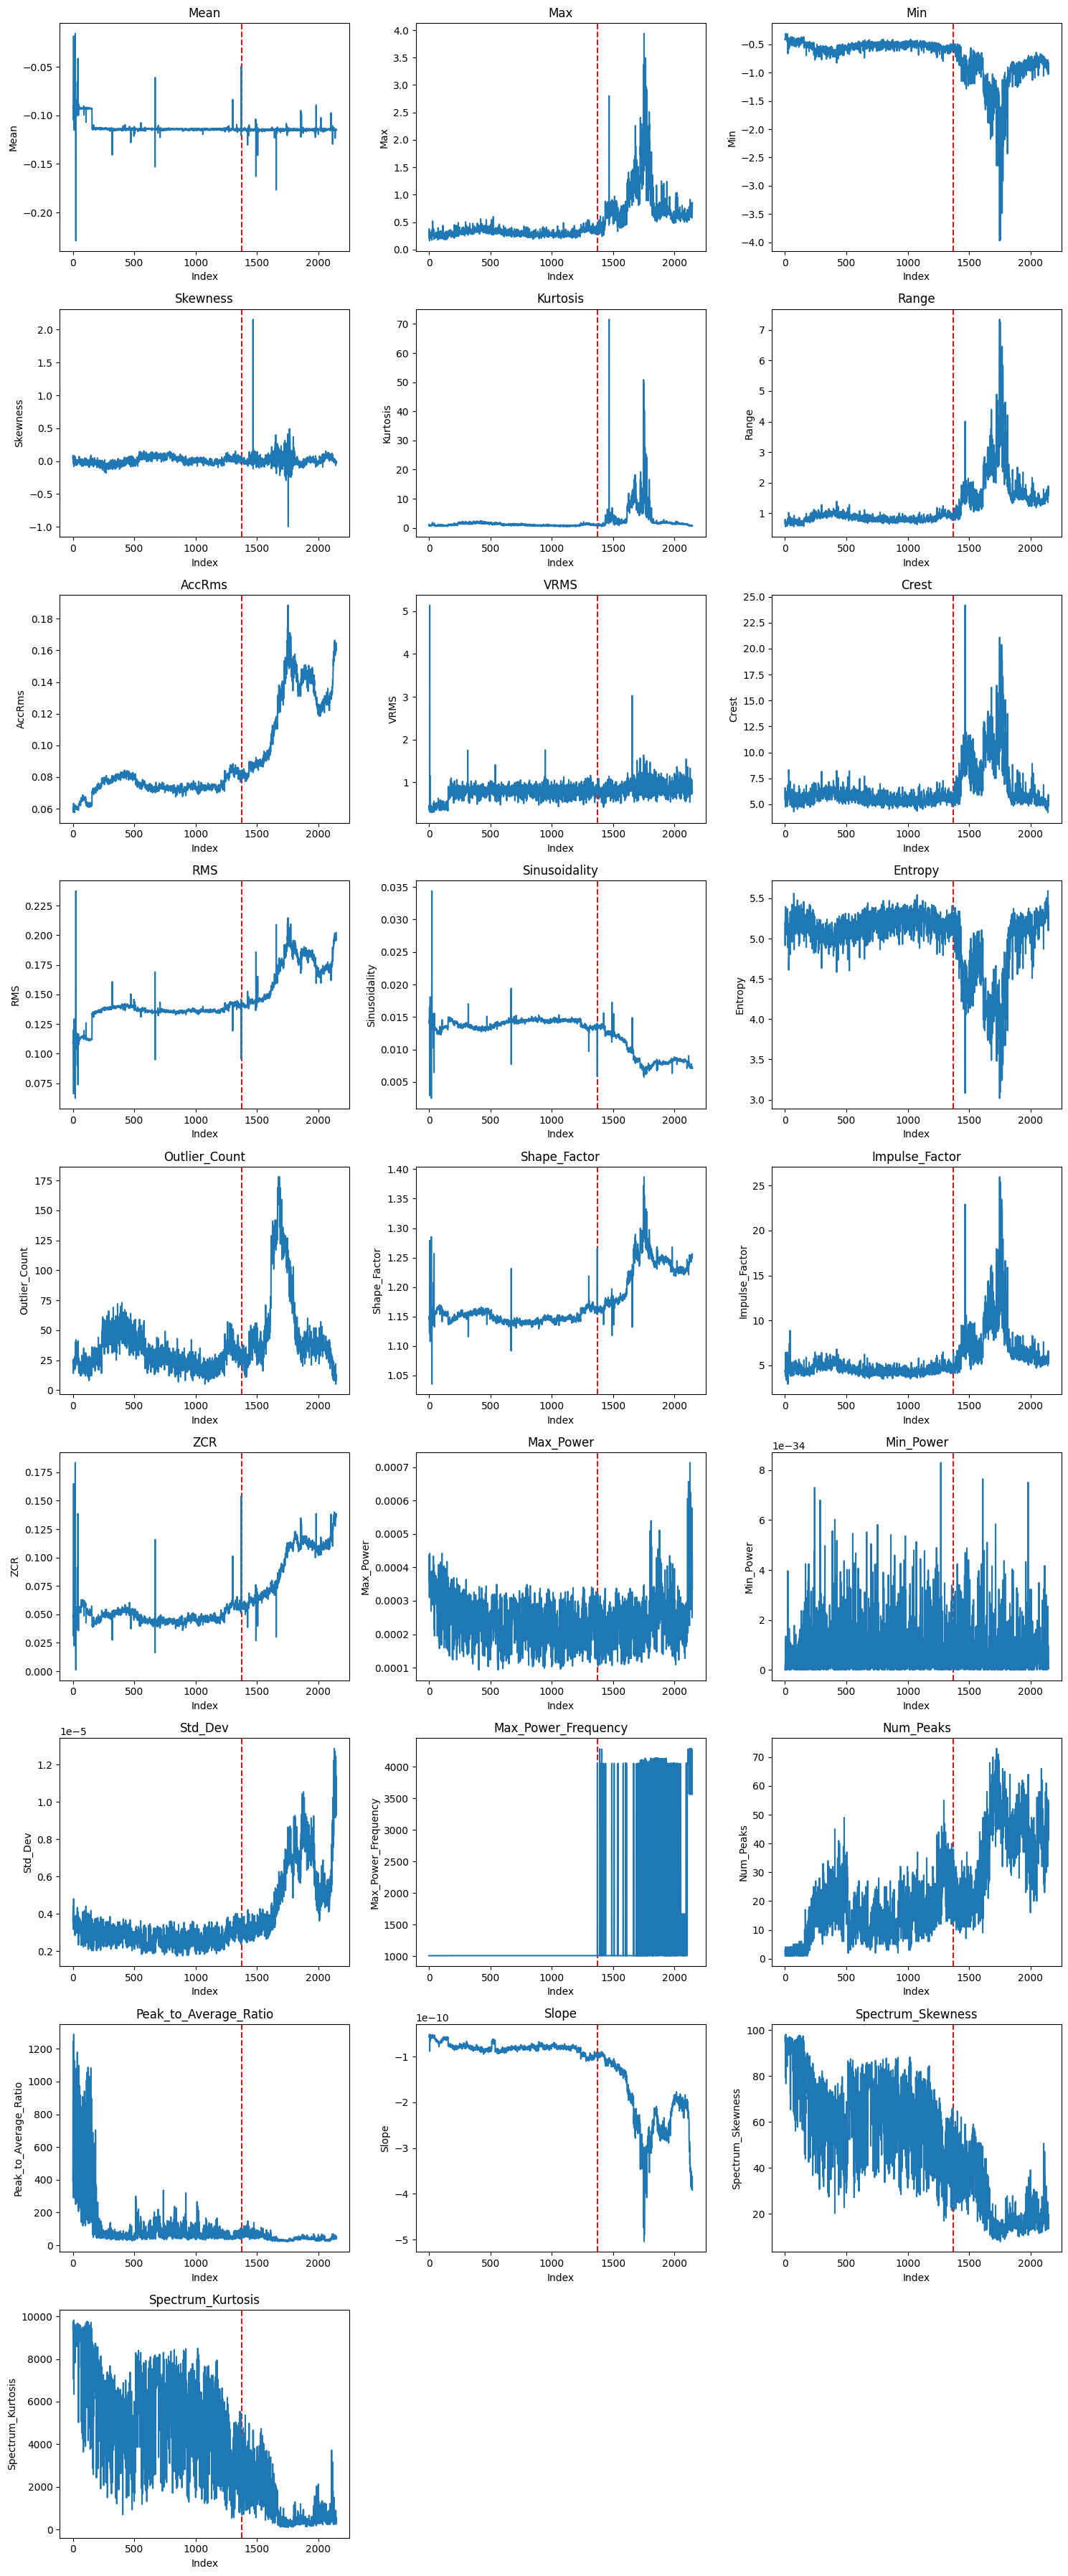

In [36]:
import matplotlib.pyplot as plt

# Assuming a is your DataFrame
num_columns = len(a.columns)
num_rows = int(math.ceil(num_columns / 3))  # Adjust the number of rows as needed

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes to make iteration easier
index_to_highlight = 1373
for i, col in enumerate(a.columns):
    axes[i].axvline(x=index_to_highlight, color='red', linestyle='--')
    axes[i].plot(a[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    # Add vertical red dotted line at index 1373
    
    
# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
#3번 4번 성분은 0.04정도로 설명 가능한 분산량이 얼마 증가하지 않기 때문에,
#주성분은 2개로 결정하는 것이 적절하다.
#점점 작아지도록 정렬되어 있음을 알 수 있다.
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(StandardScaler().fit_transform(a))
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
print(pca.explained_variance_ratio_)


[0.53576041 0.1318288 ]


In [16]:

DATA_PATH = '/home/geon/dev_geon/cms/dataset/raw_data/'
files = os.listdir(DATA_PATH)
data = [pd.read_csv(os.path.join(DATA_PATH, files[i])) for i in range(len(files)) if files[i].endswith('csv')]
metadata = pd.read_excel(os.path.join(DATA_PATH, 'MetaData.xlsx'))

In [17]:
metadata

MeasureId  ChannelId              Type               PointName  ModuleId  \
0          378        147      Acceleration           A6_M_GEAR_3rd        14   
1          379        147          Velocity           A6_M_GEAR_3rd        14   
2          380        147      Crest Factor           A6_M_GEAR_3rd        14   
3          381        147      Peak to Peak           A6_M_GEAR_3rd        14   
4          382        148      Acceleration           A6_M_GEAR_4th        14   
..         ...        ...               ...                     ...       ...   
144       4101        677      Peak to Peak  B3002_8EXT_GEAR_1st_IB        62   
145       4102        679      Peak to Peak  B3002_8EXT_GEAR_1st_OB        62   
146       4103        680      Peak to Peak  B3002_8EXT_GEAR_2nd_OB        62   
147       4157        678  Vel Crest Factor  B3002_8EXT_GEAR_3rd_IB        62   
148       4158        680  Vel Crest Factor  B3002_8EXT_GEAR_2nd_OB        62   

           ModuleName  Integral  MeasureType  BandLow  BandHigh  
0     Module14(IP 81)         0            0     10.0    3200.0  
1     Module14(IP 81)         1            0      5.0    1000.0  
2     Module14(IP 81)         0            3     -1.0       1.0  
3     Module14(IP 81)         0            7     -1.0       1.0  
4     Module14(IP 81)         0            0     10.0    3200.0  
..                ...       ...          ...      ...       ...  
144  Module62(IP 130)         0            7      0.0       0.0  
145  Module62(IP 130)         0            7      0.0       0.0  
146  Module62(IP 130)         0            7      0.0       0.0  
147  Module62(IP 130)         1            3      0.0       0.0  
148  Module62(IP 130)         1            3      0.0       0.0  

[149 rows x 10 columns]

In [18]:
df_list_1 = []
df_list_2 = []
df_list_3 = []
df_list_4 = []

df_lists = [df_list_1, df_list_2, df_list_3, df_list_4]

# Iterate over each dataframe in 'data'
for i, df_list in enumerate(df_lists):
    # Iterate over each unique MeasureId in the metadata dataframe
    for measureid in metadata["MeasureId"].unique():
        # Check if this MeasureId is also in the current dataframe
        if measureid in data[i]["MeasureId"].unique():
            # Filter the current dataframe for the current MeasureId
            filtered_df = data[i][data[i]["MeasureId"] == measureid]
            # Add the resulting dataframe to the corresponding list
            filtered_df = filtered_df.merge(metadata, on = "MeasureId")
            df_list.append(filtered_df)



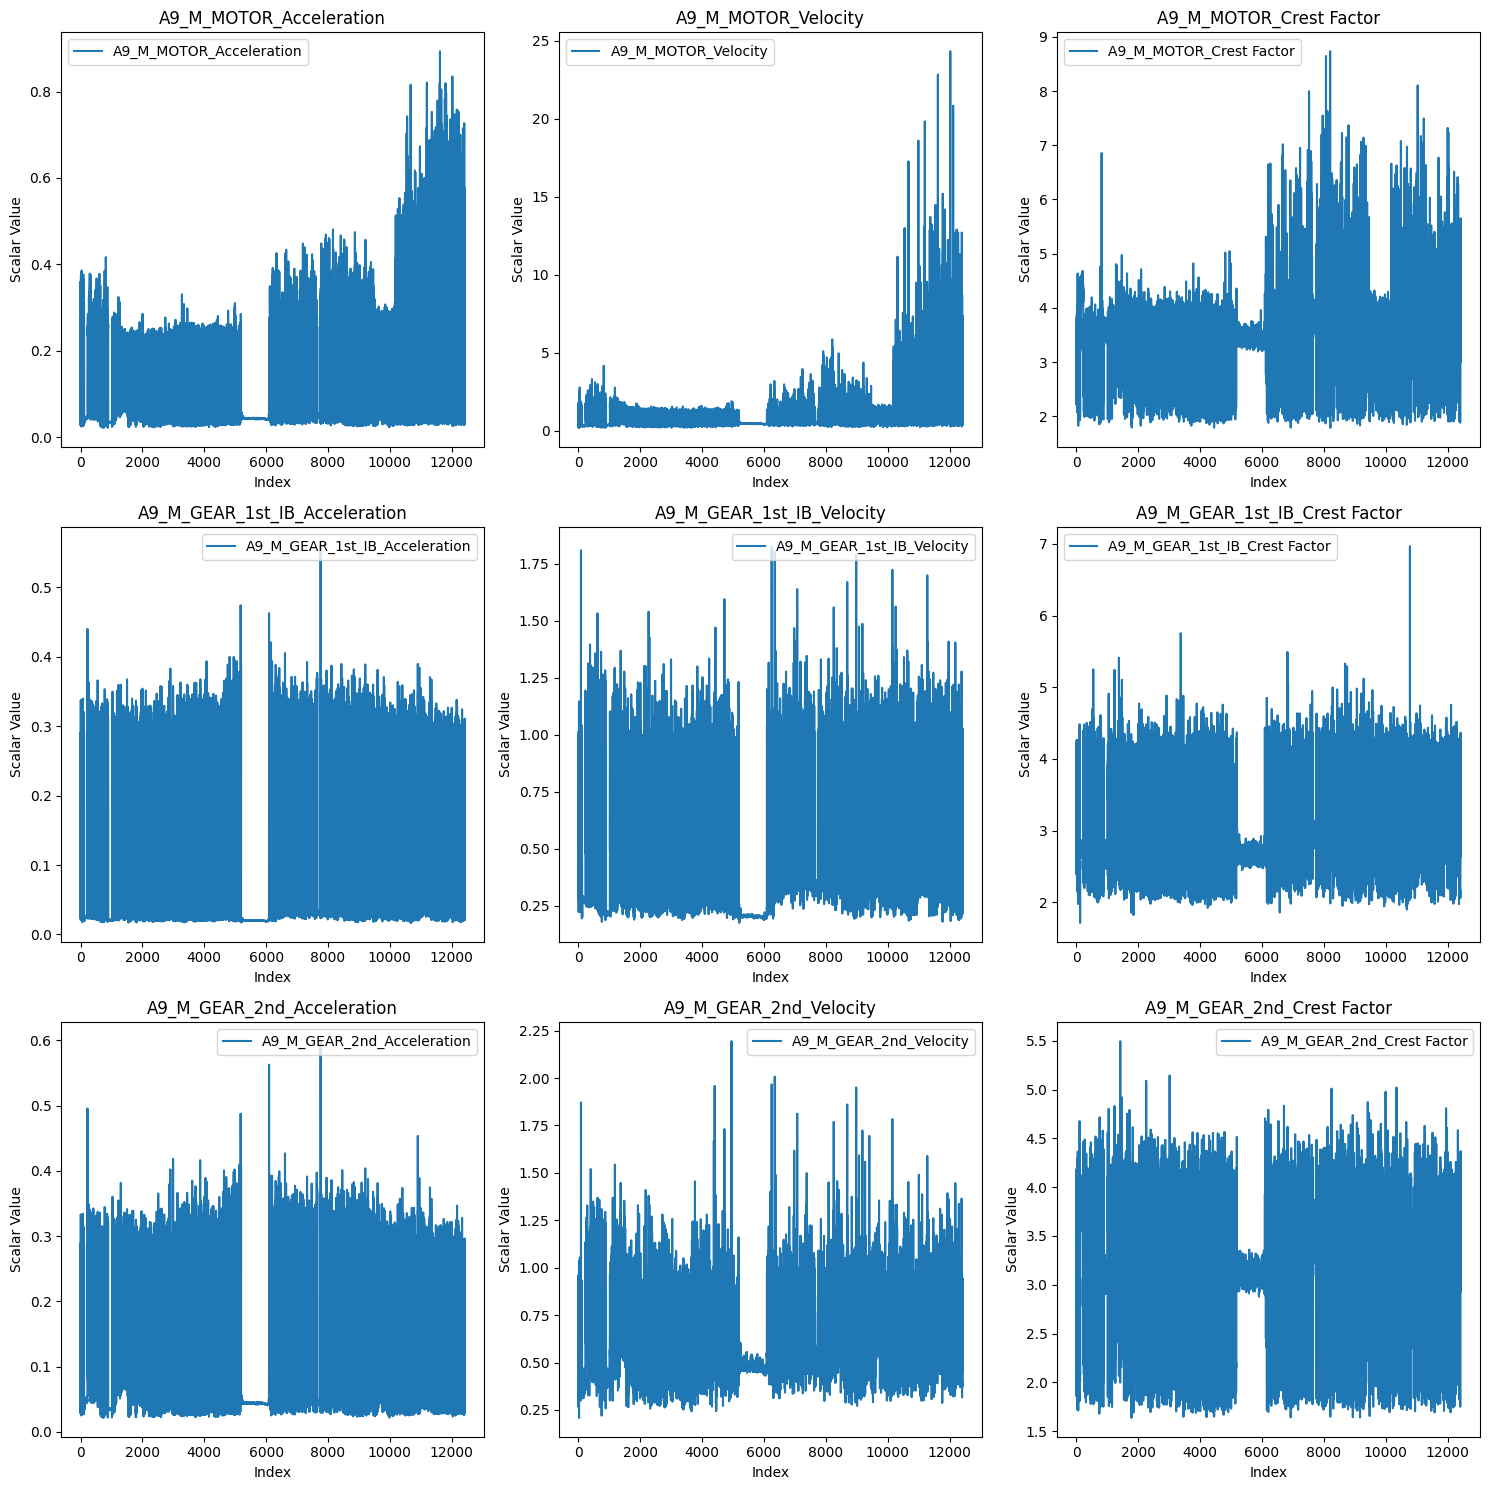

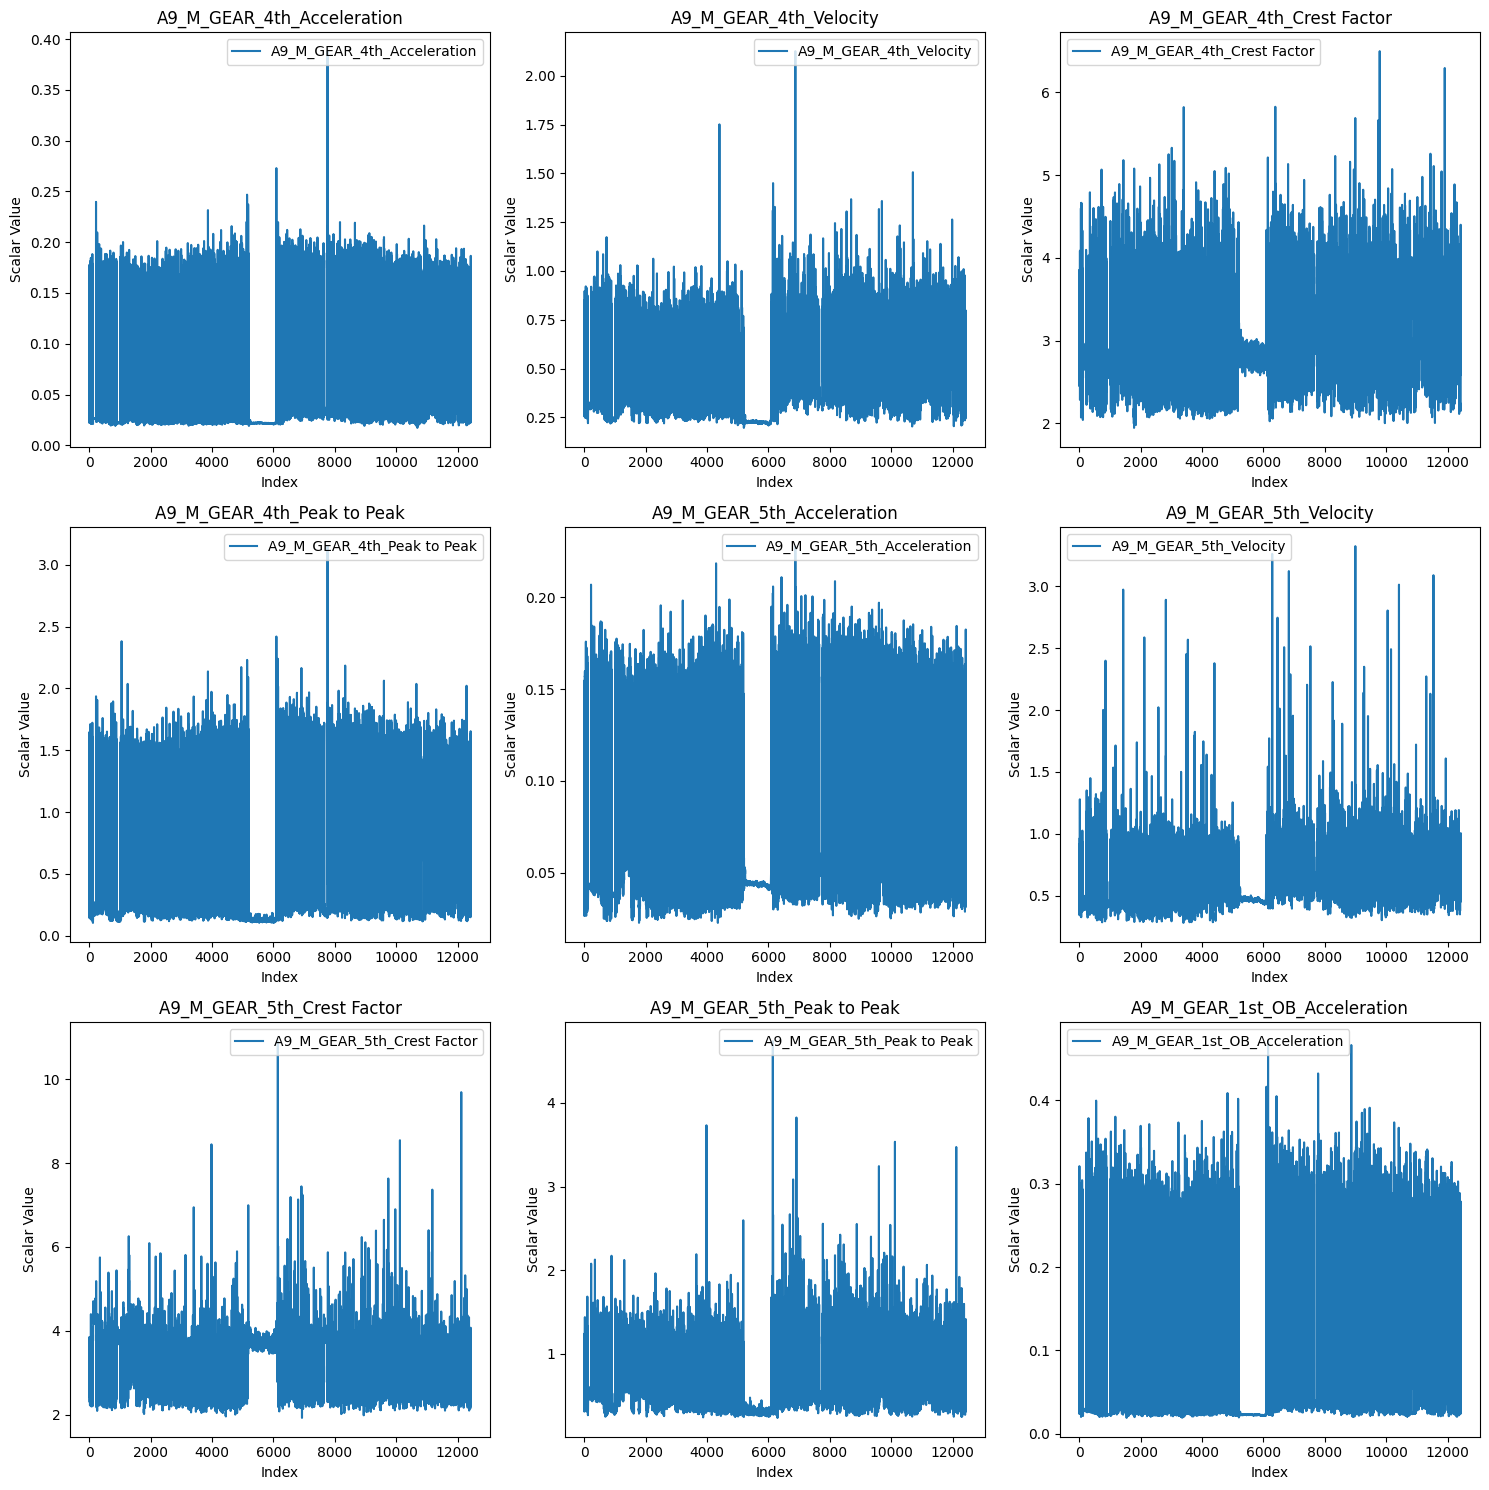

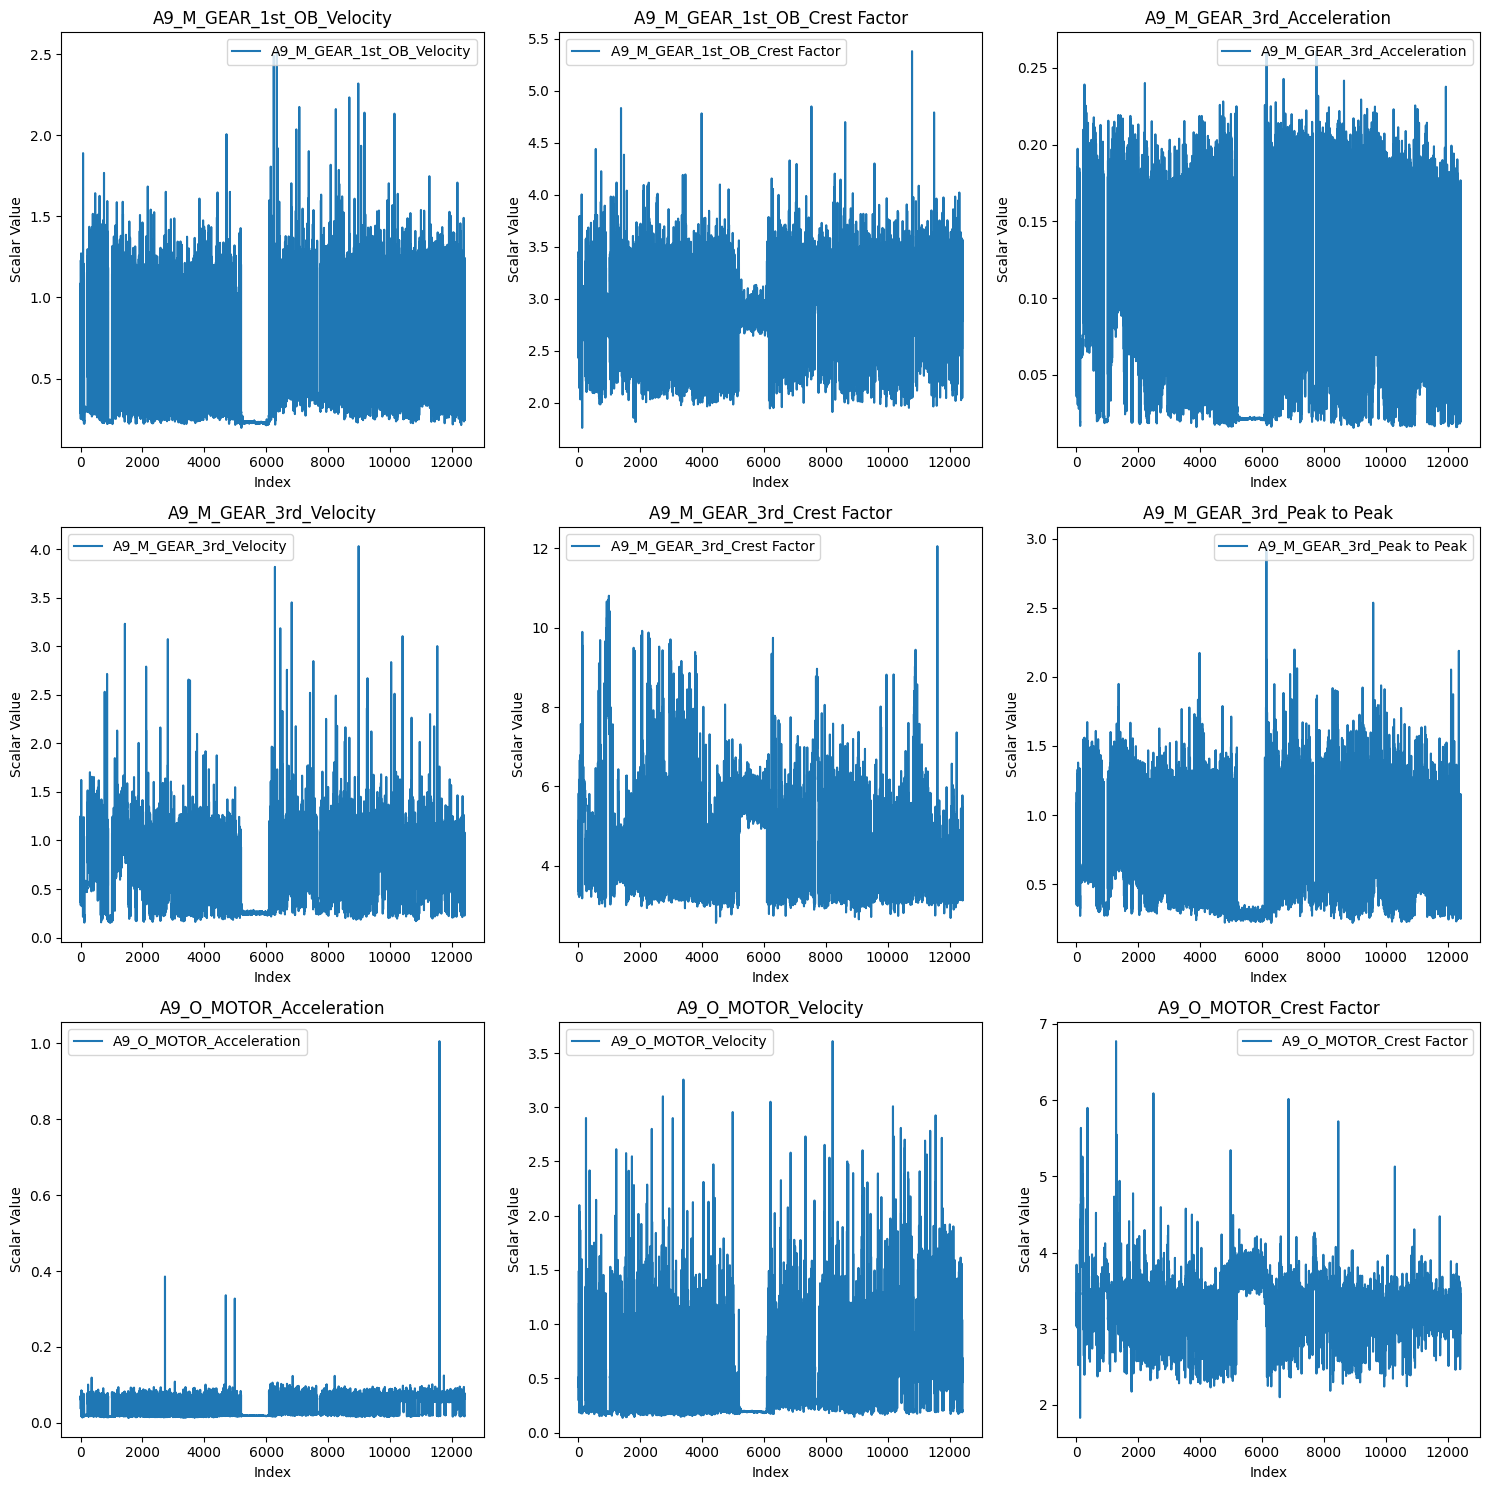

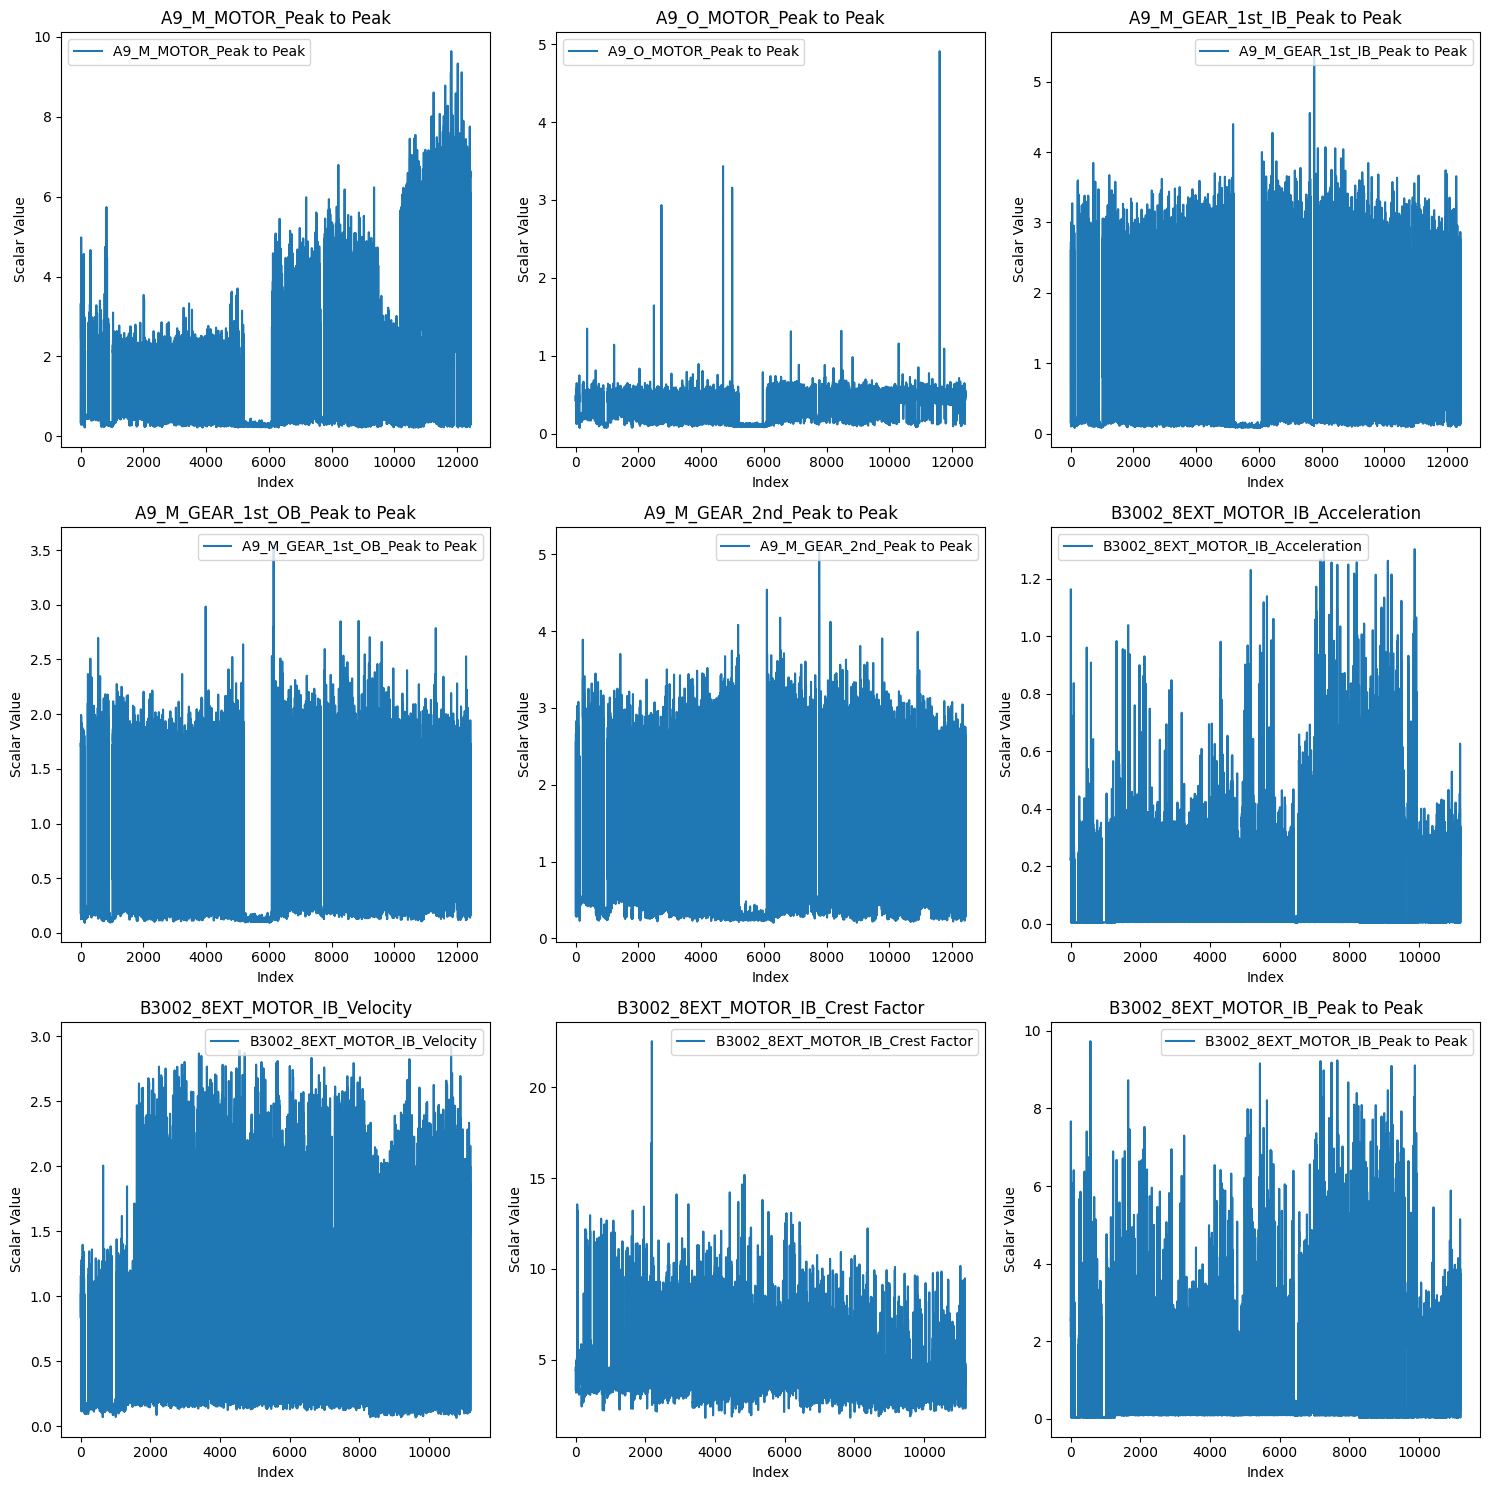

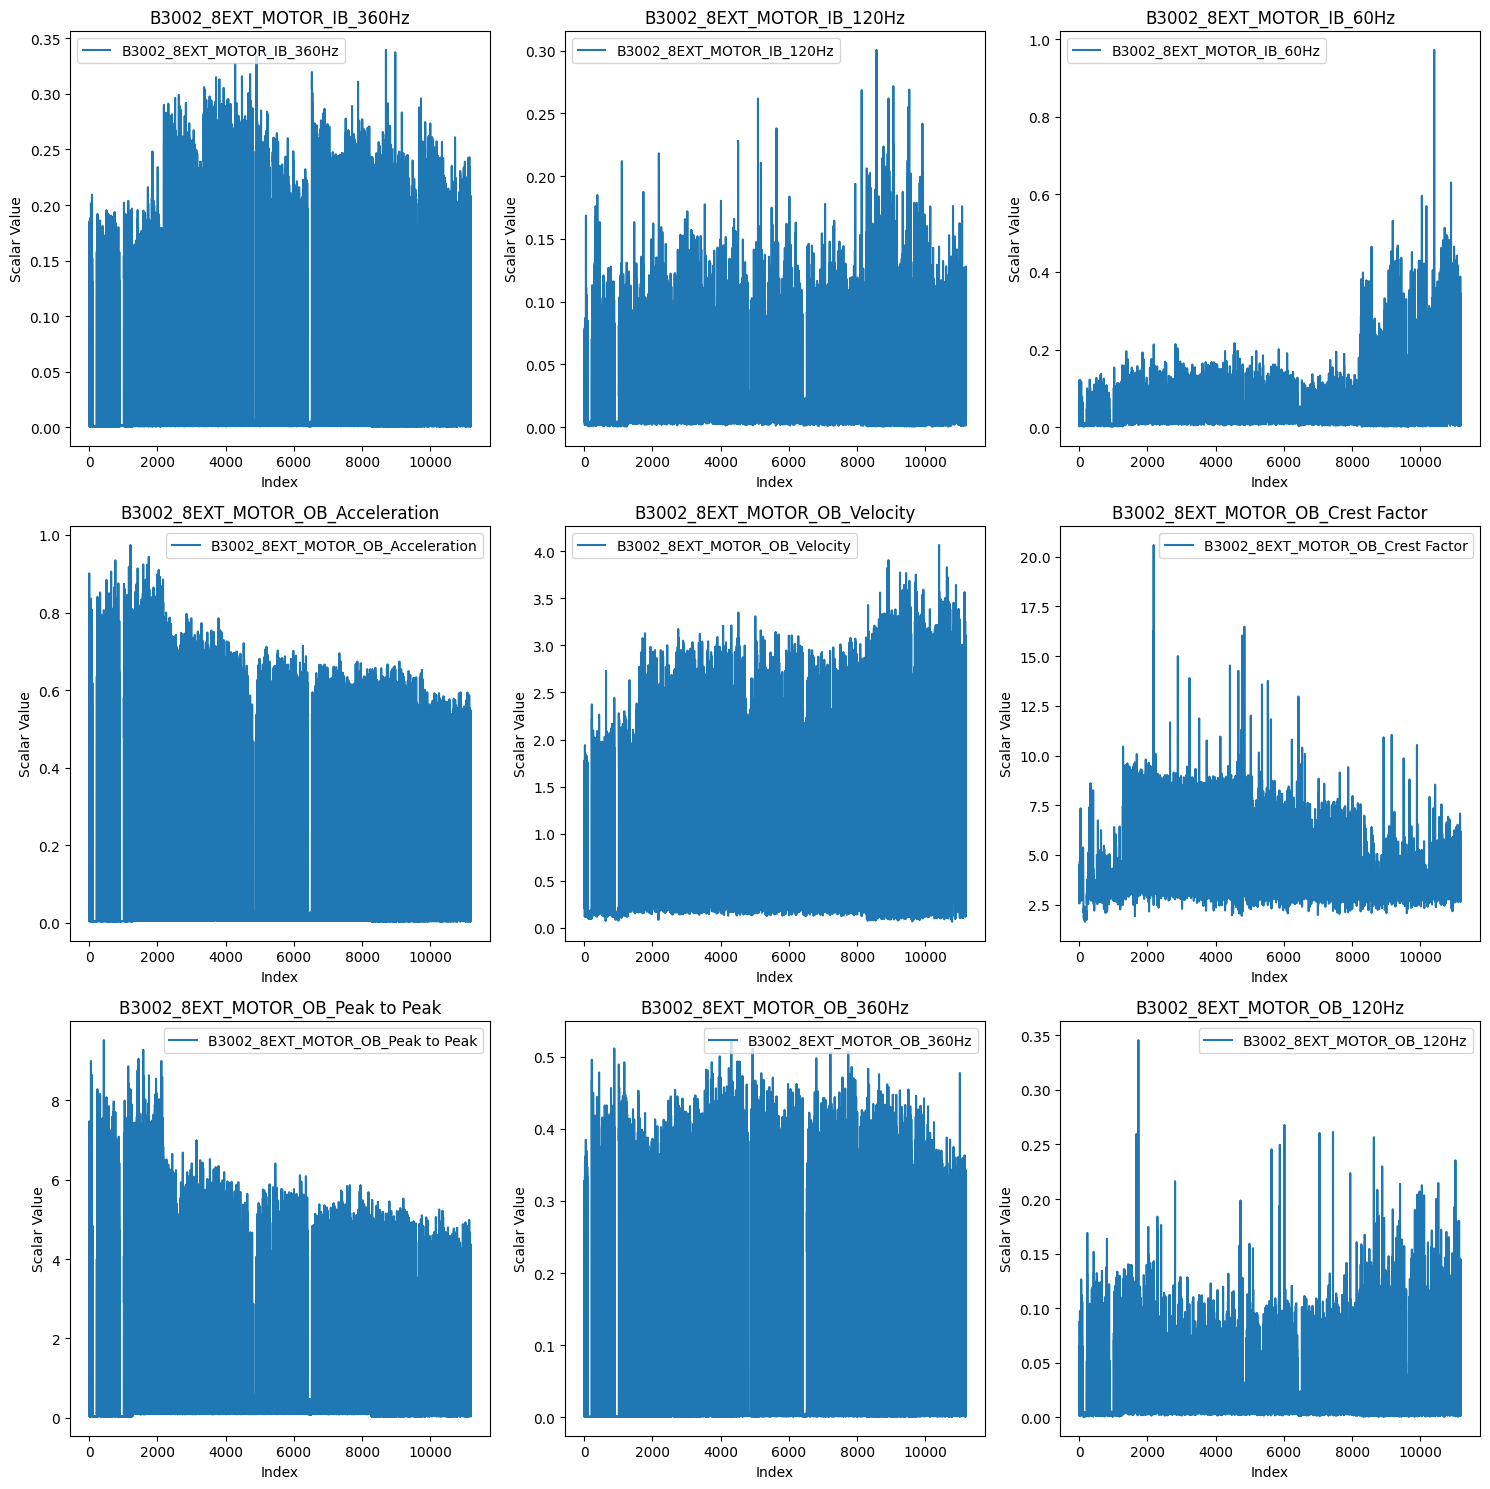

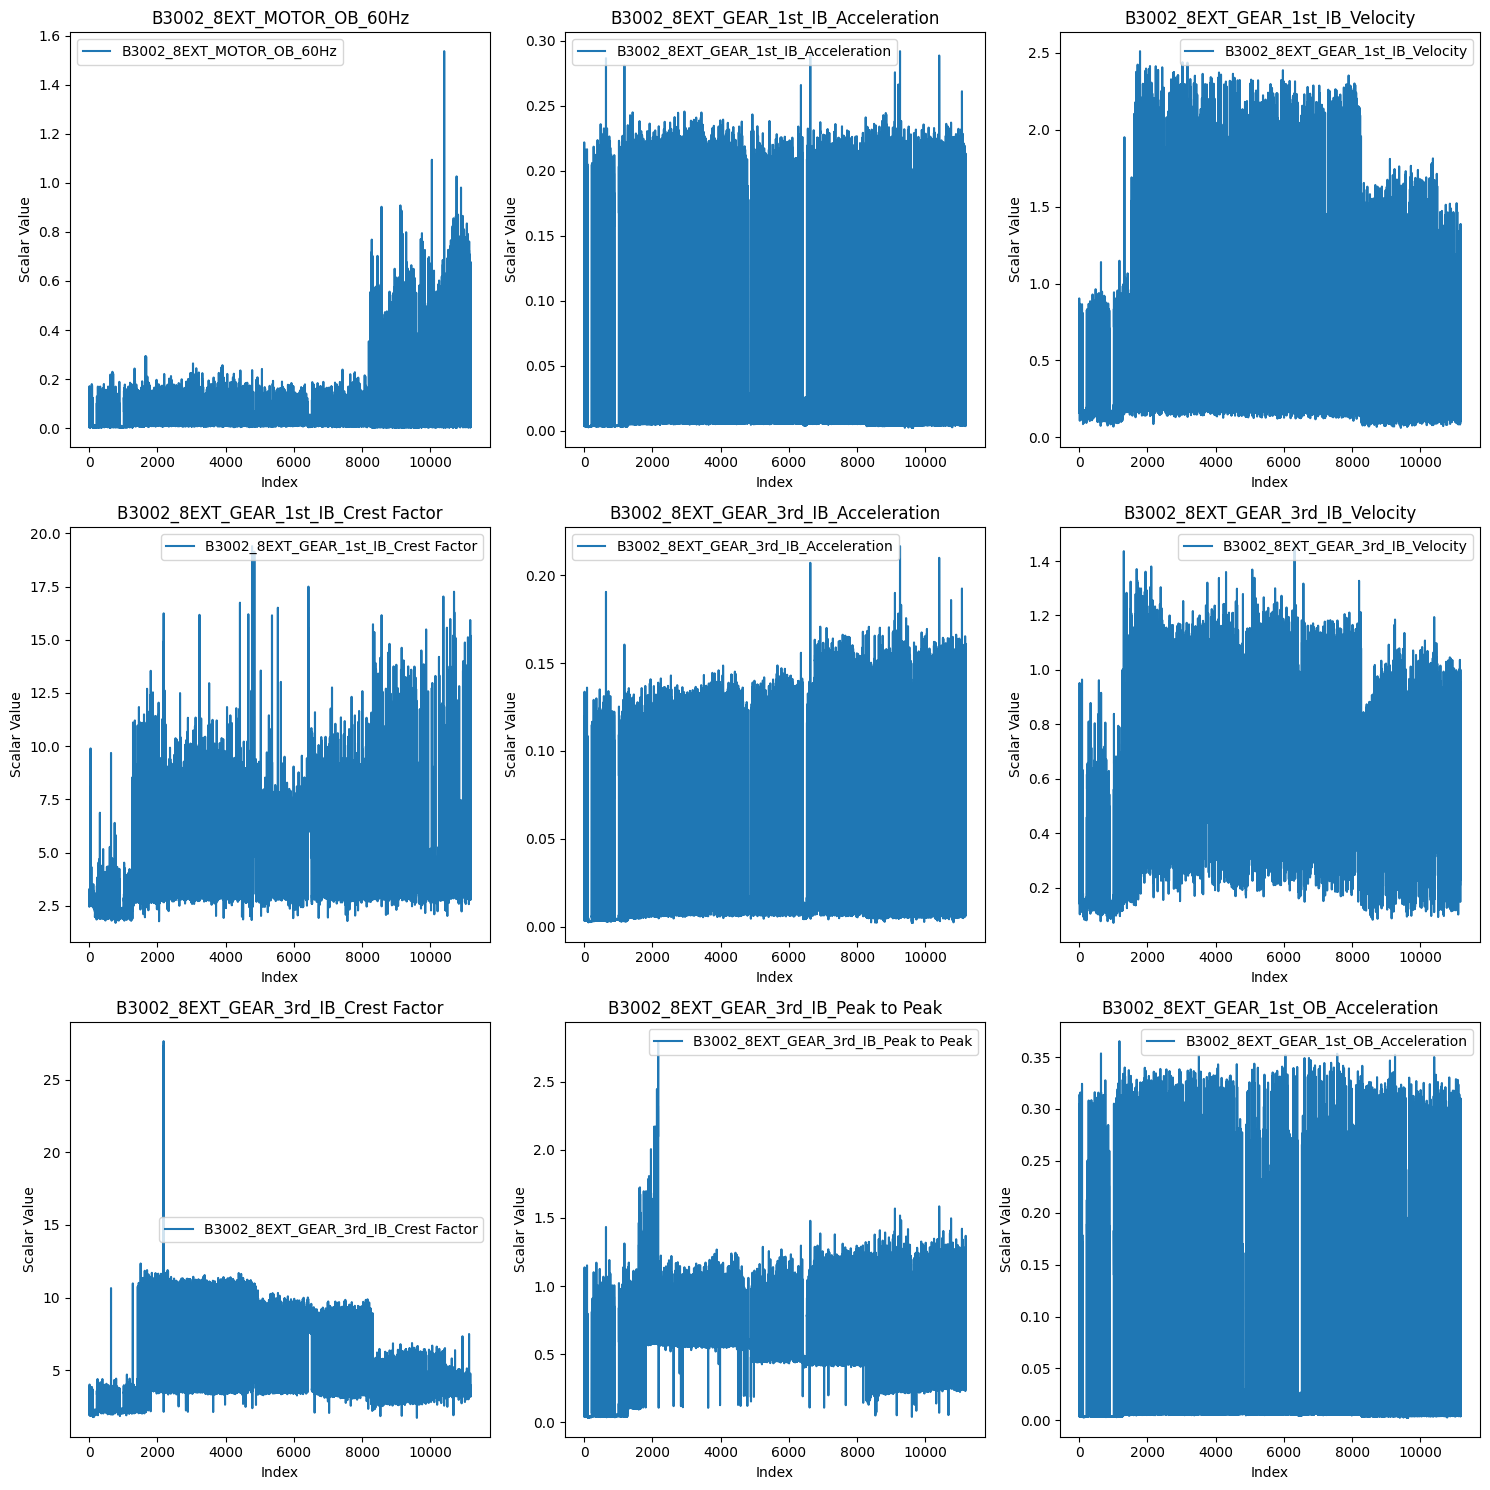

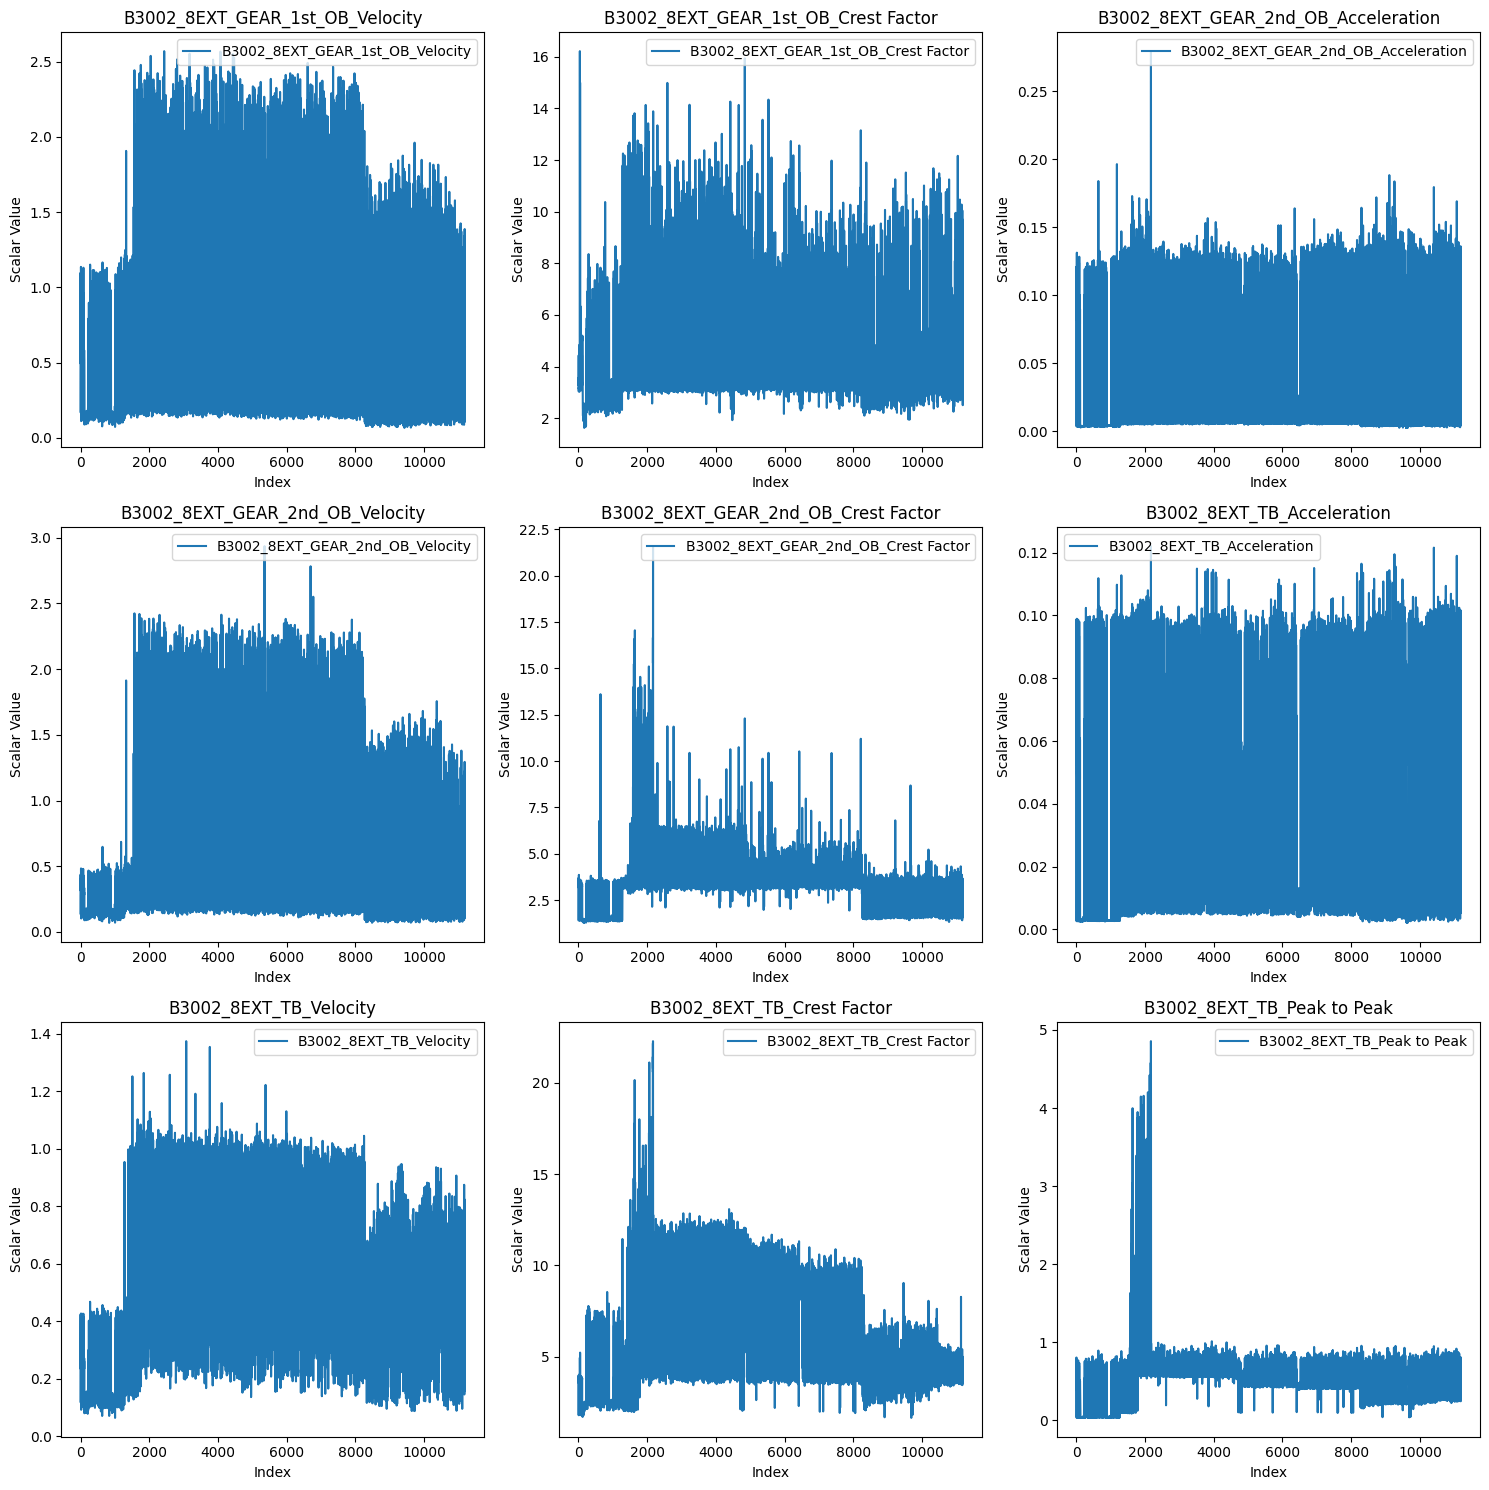

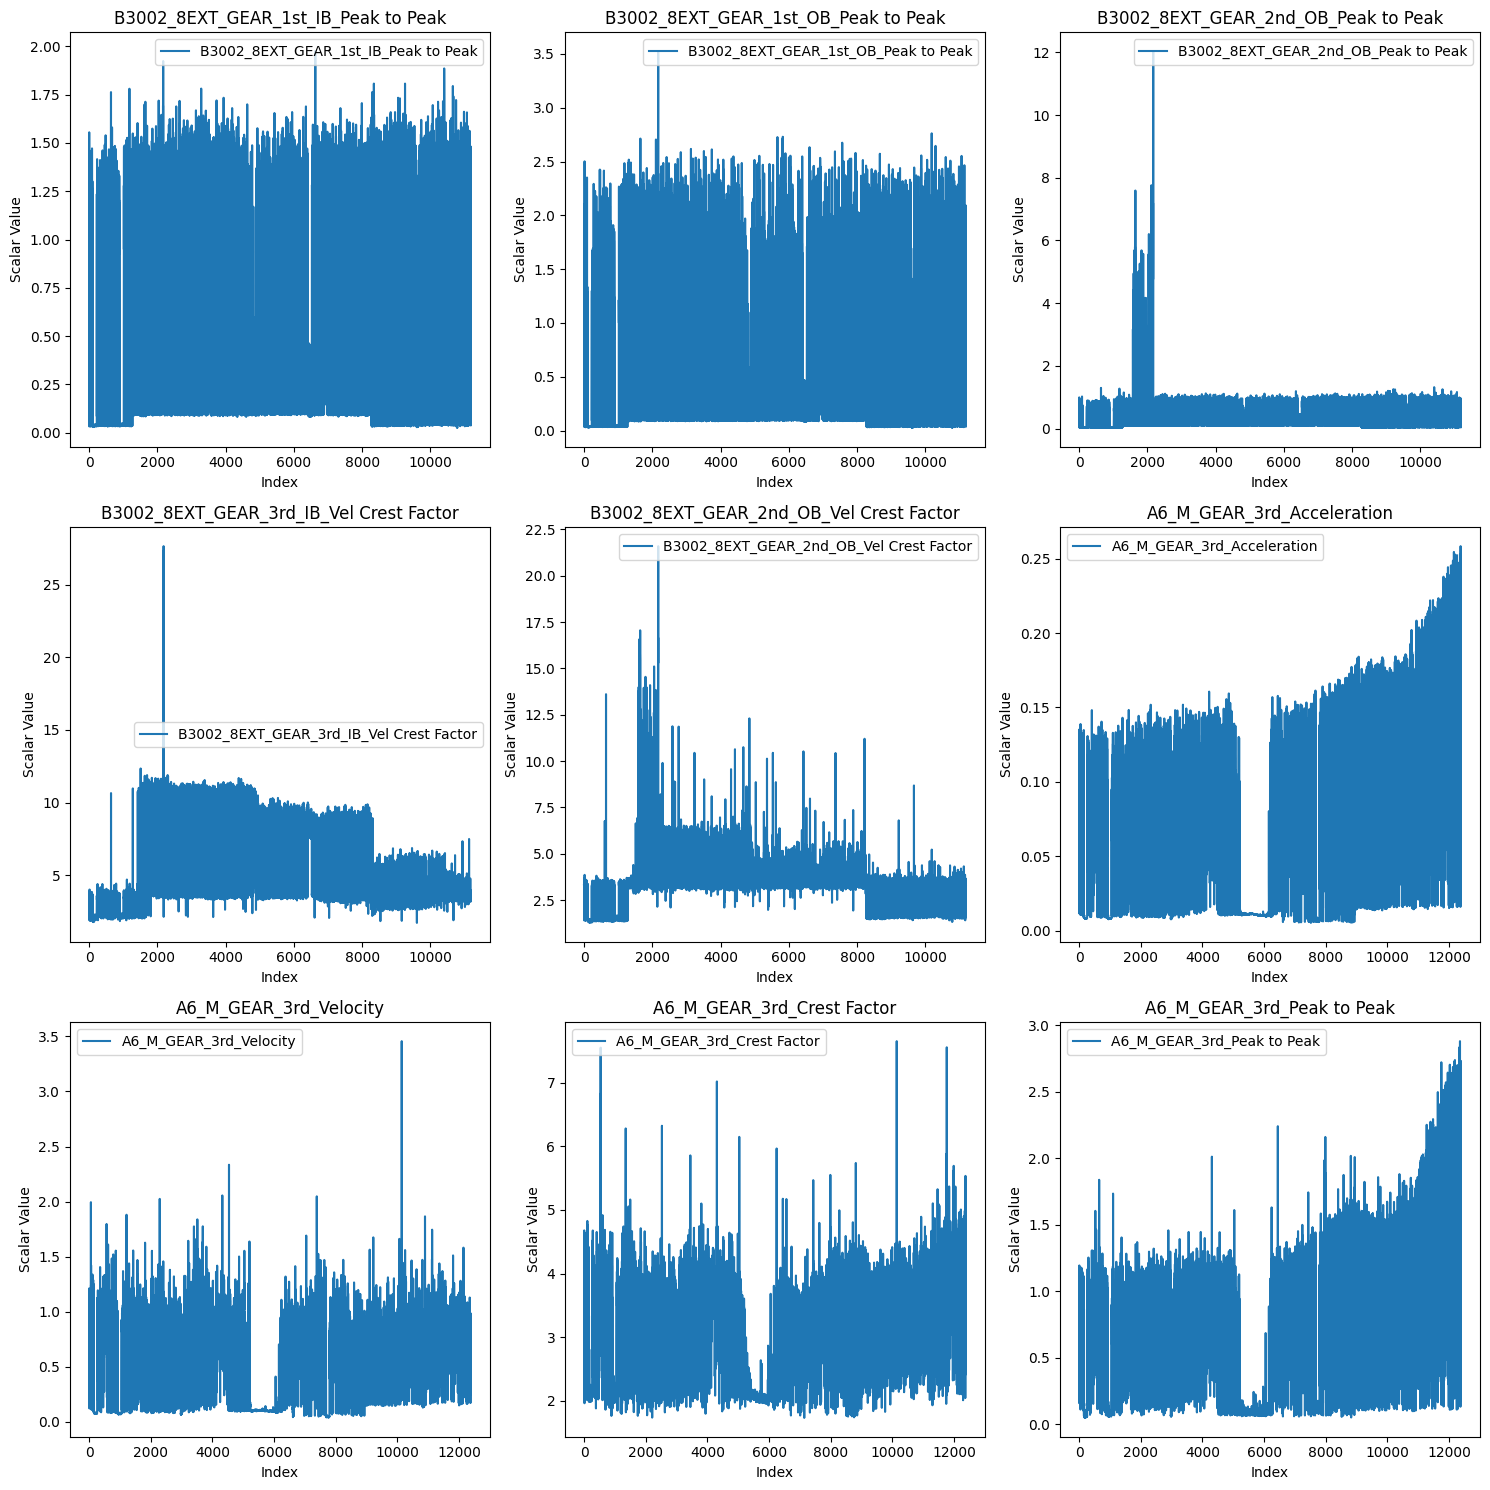

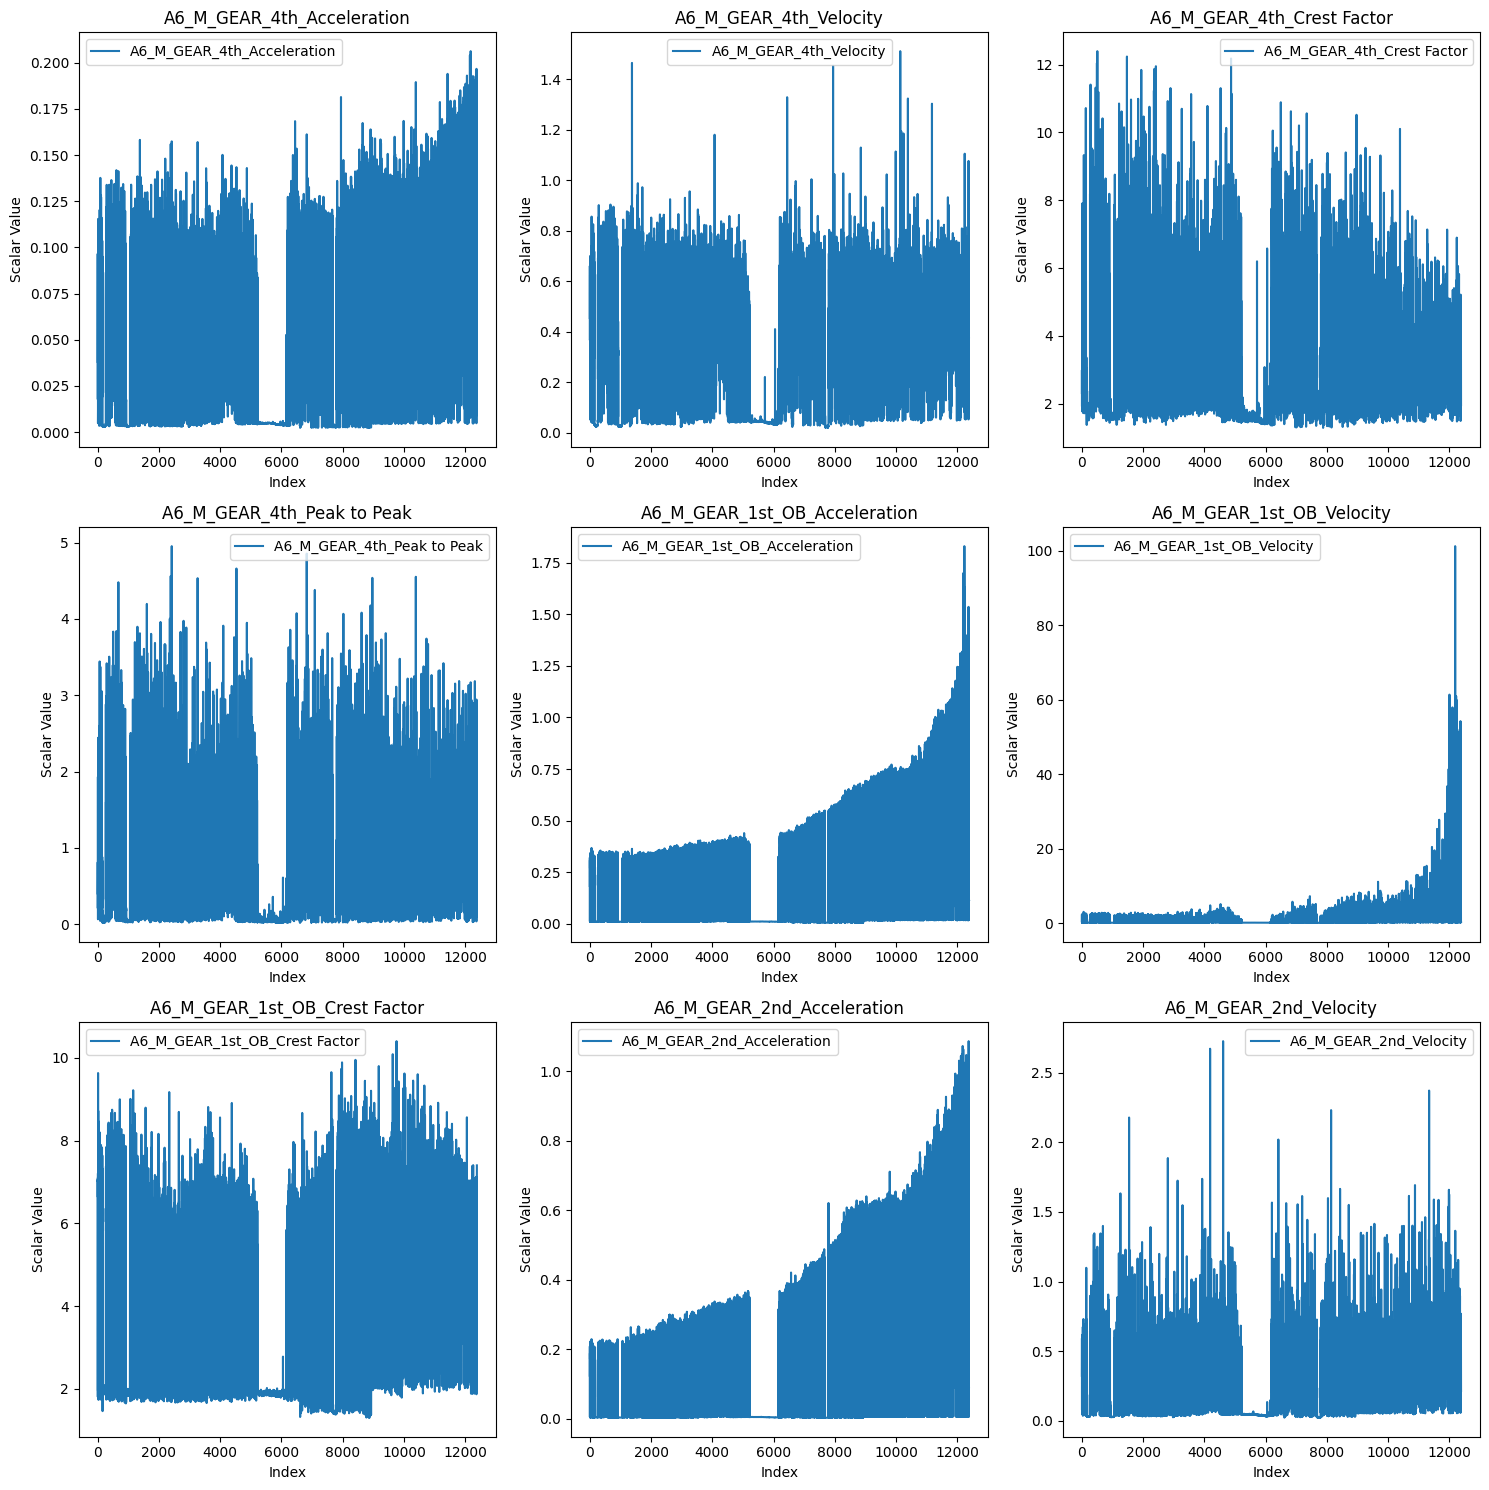

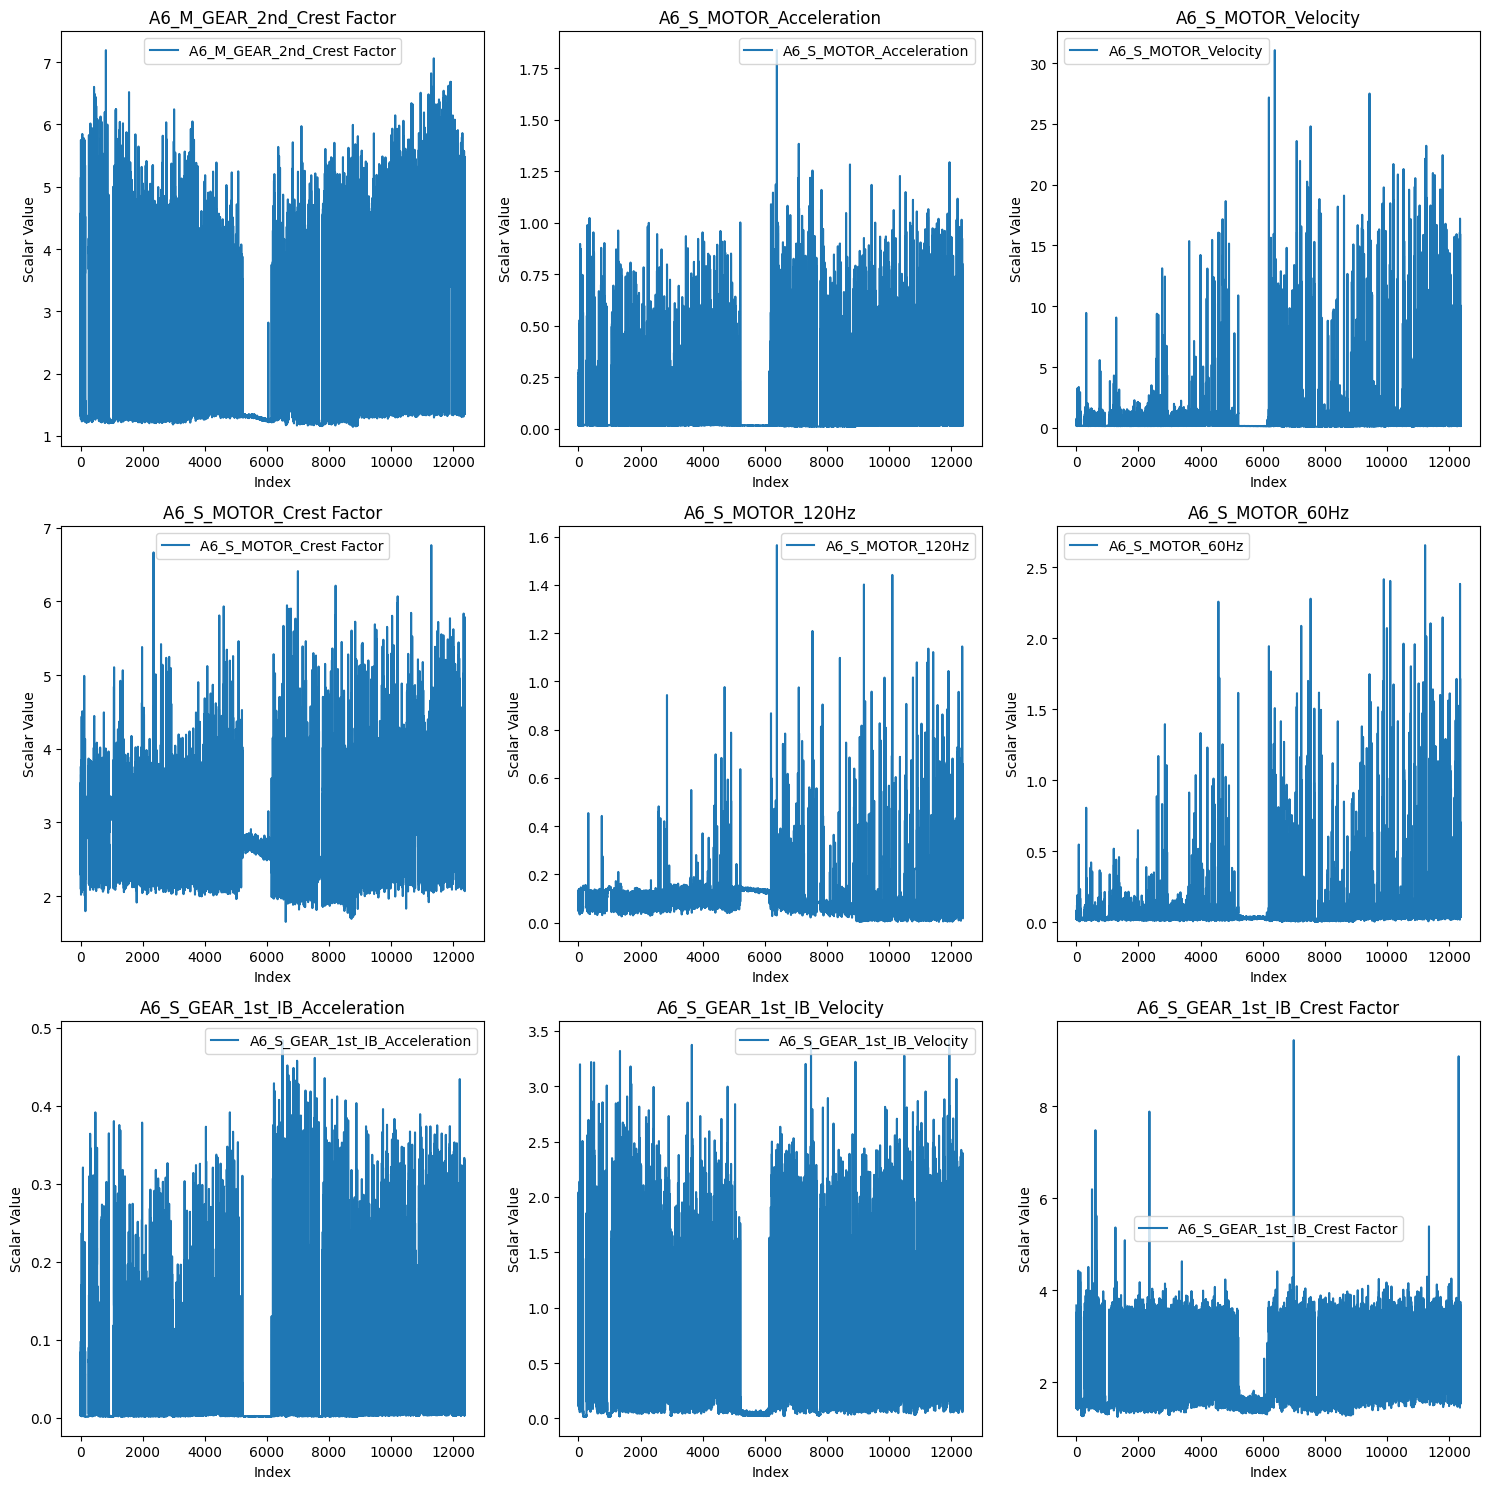

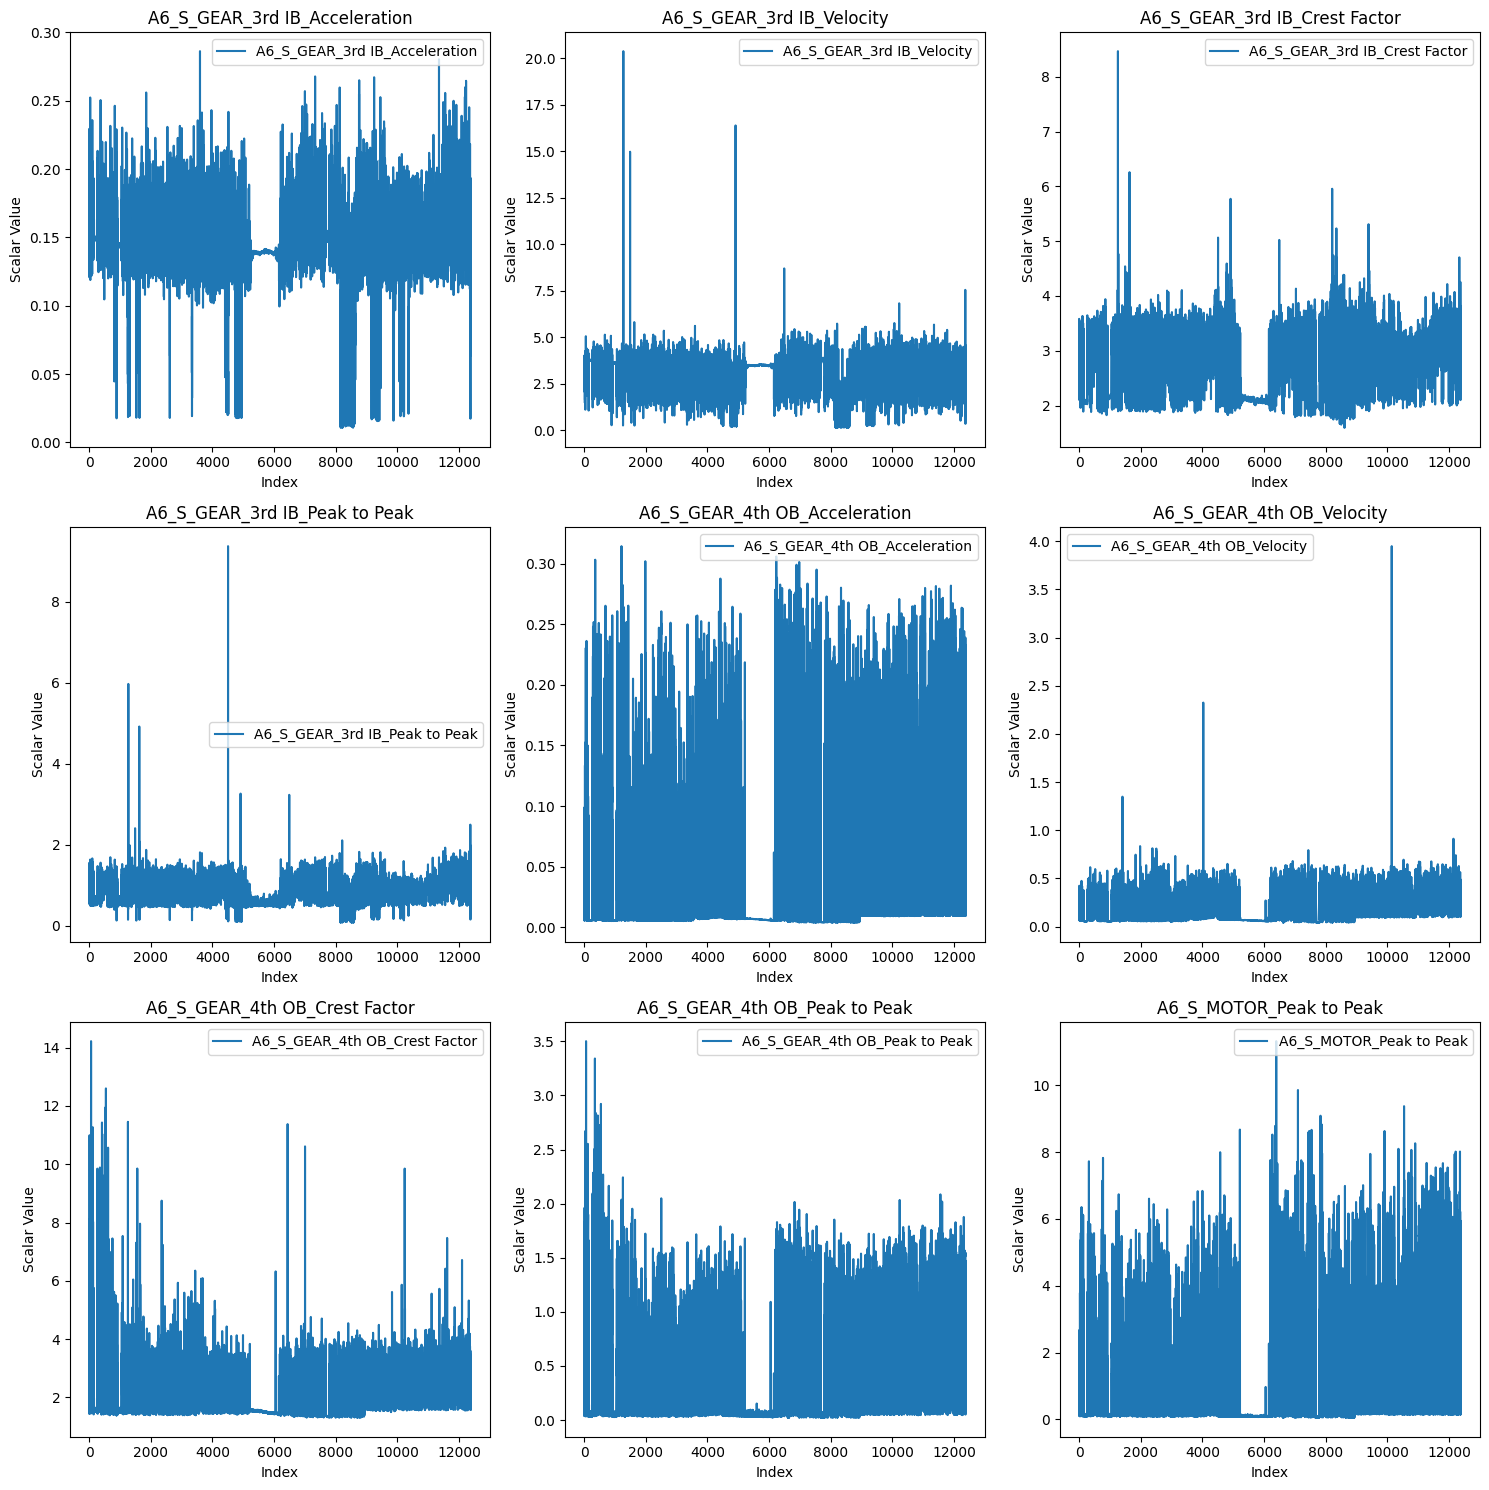

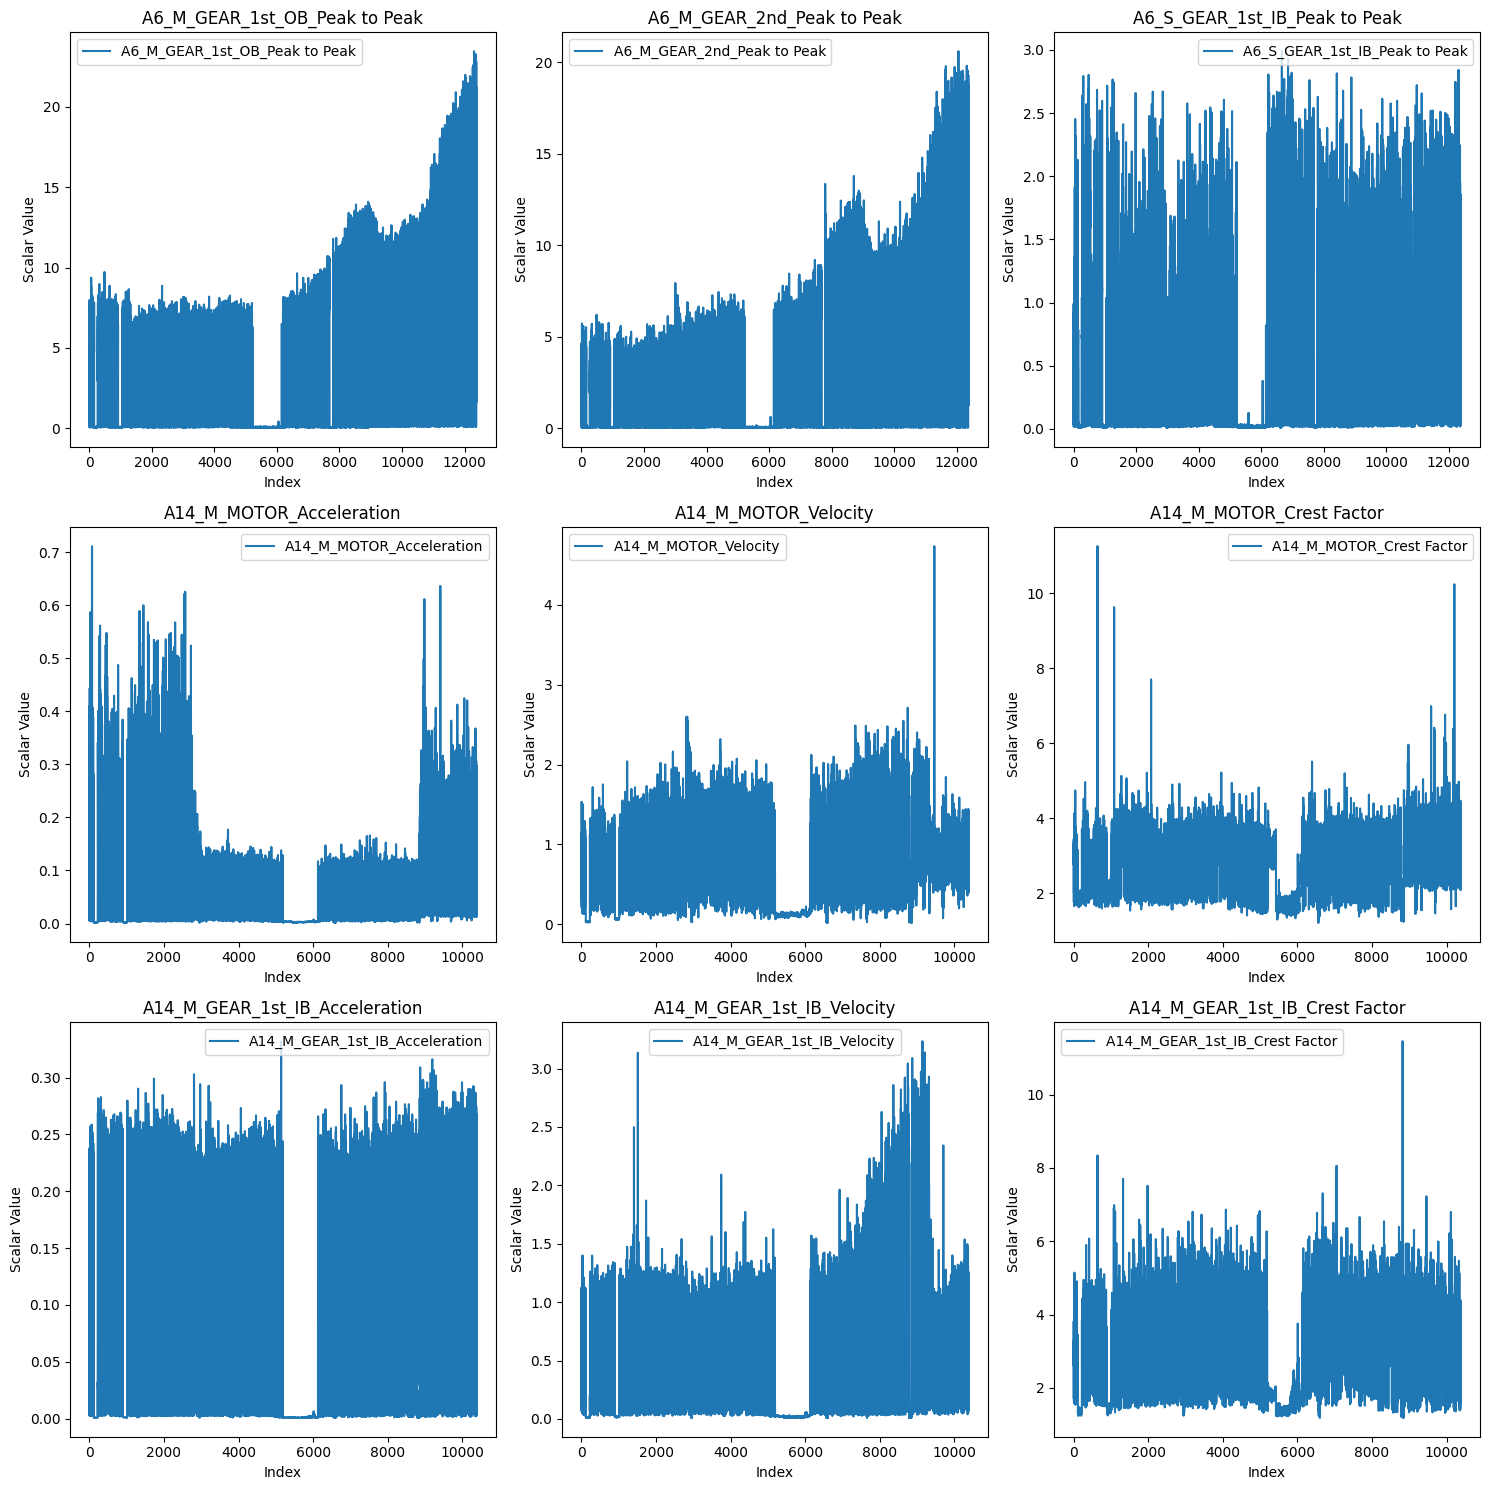

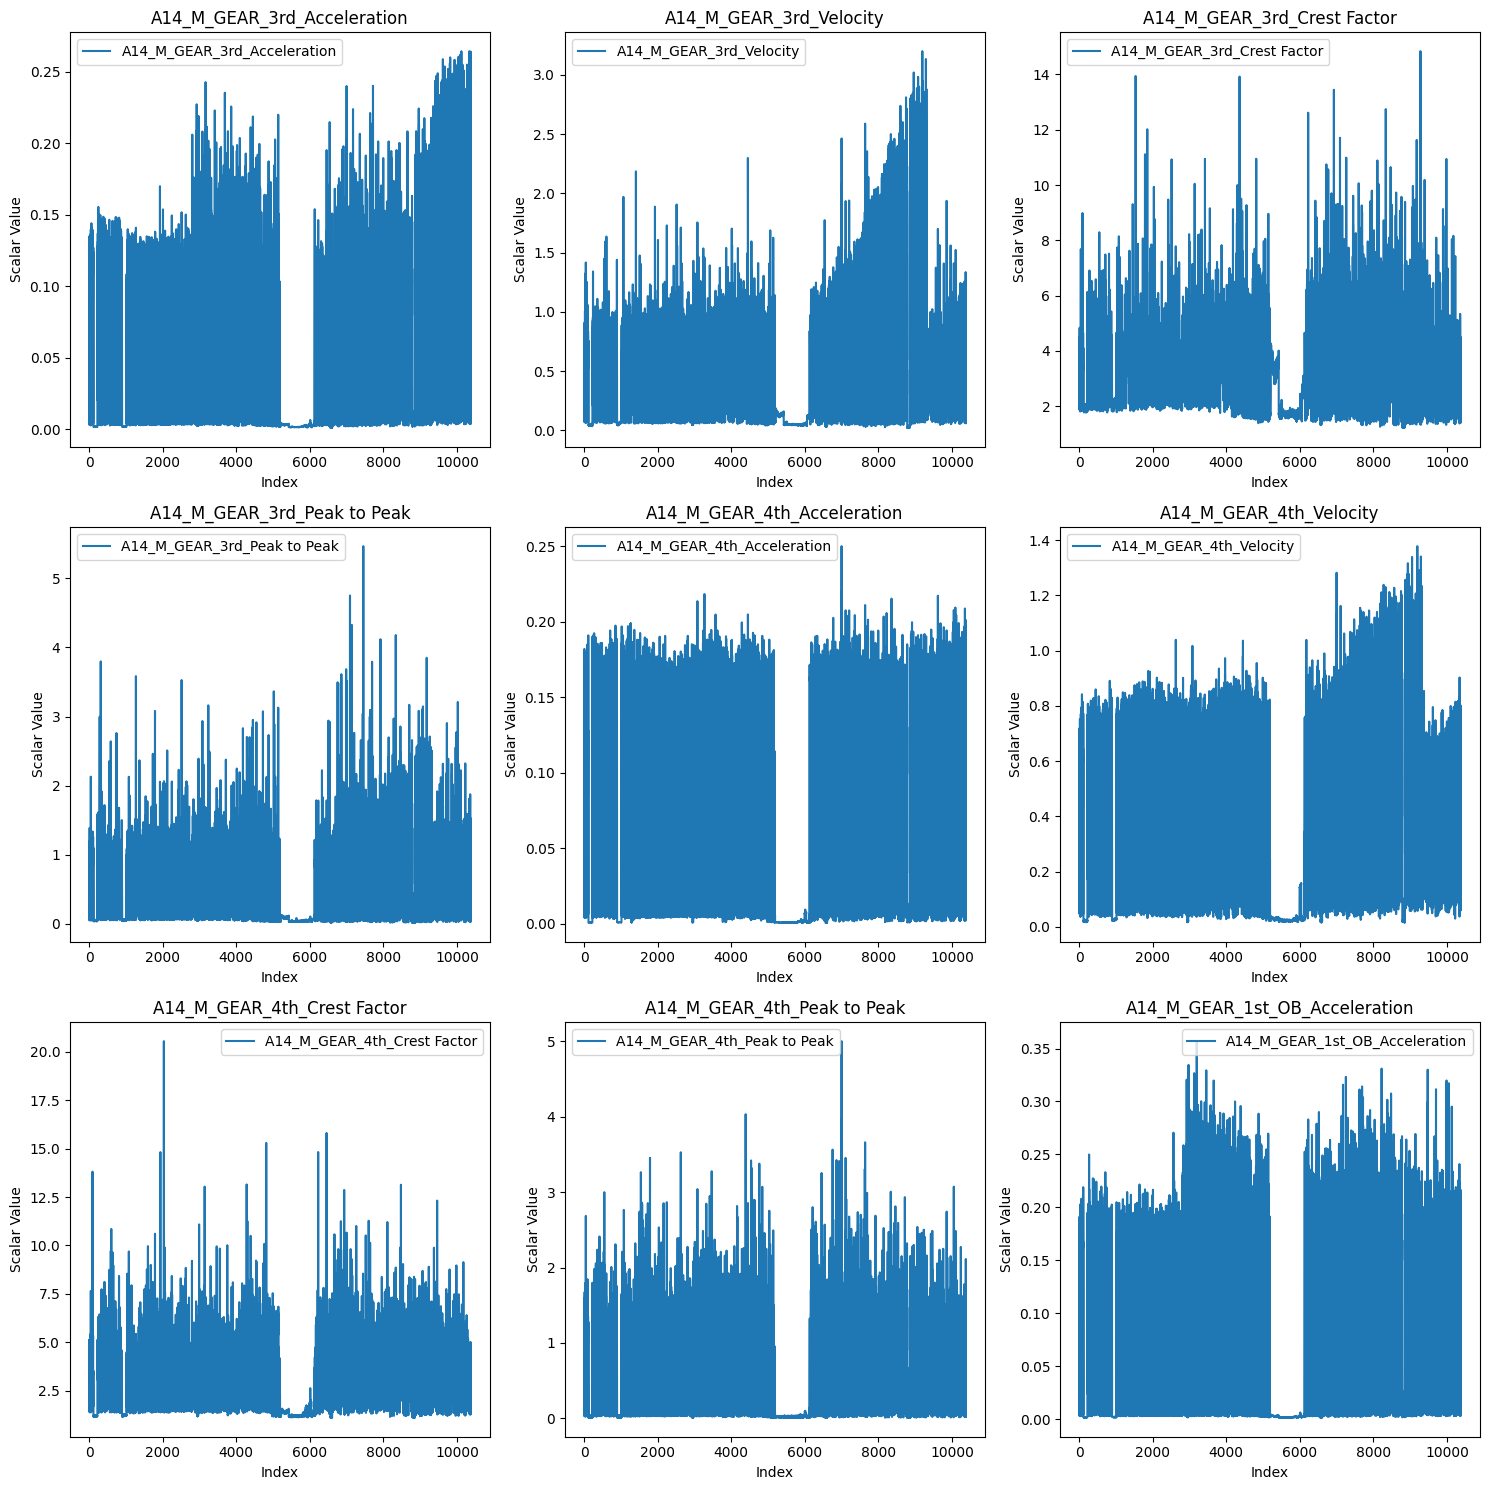

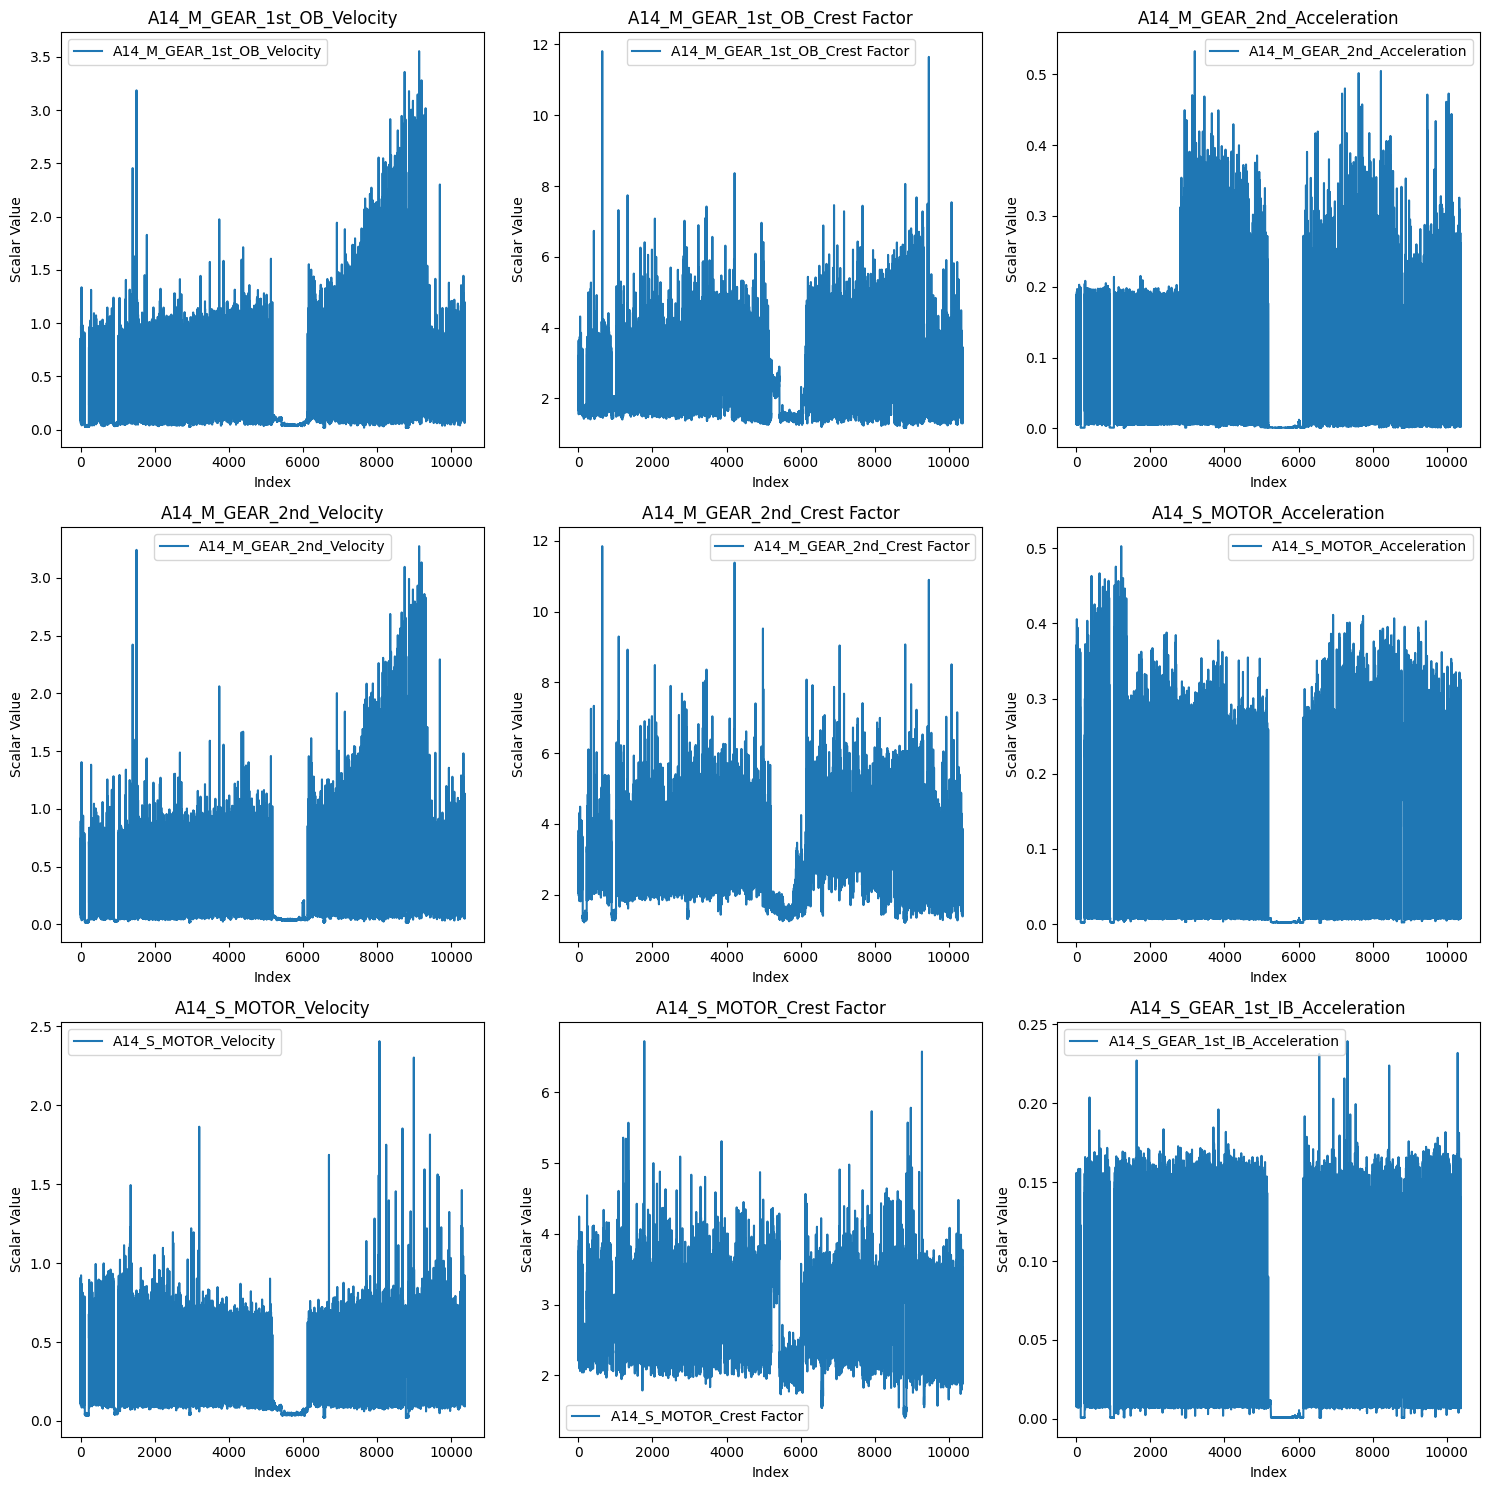

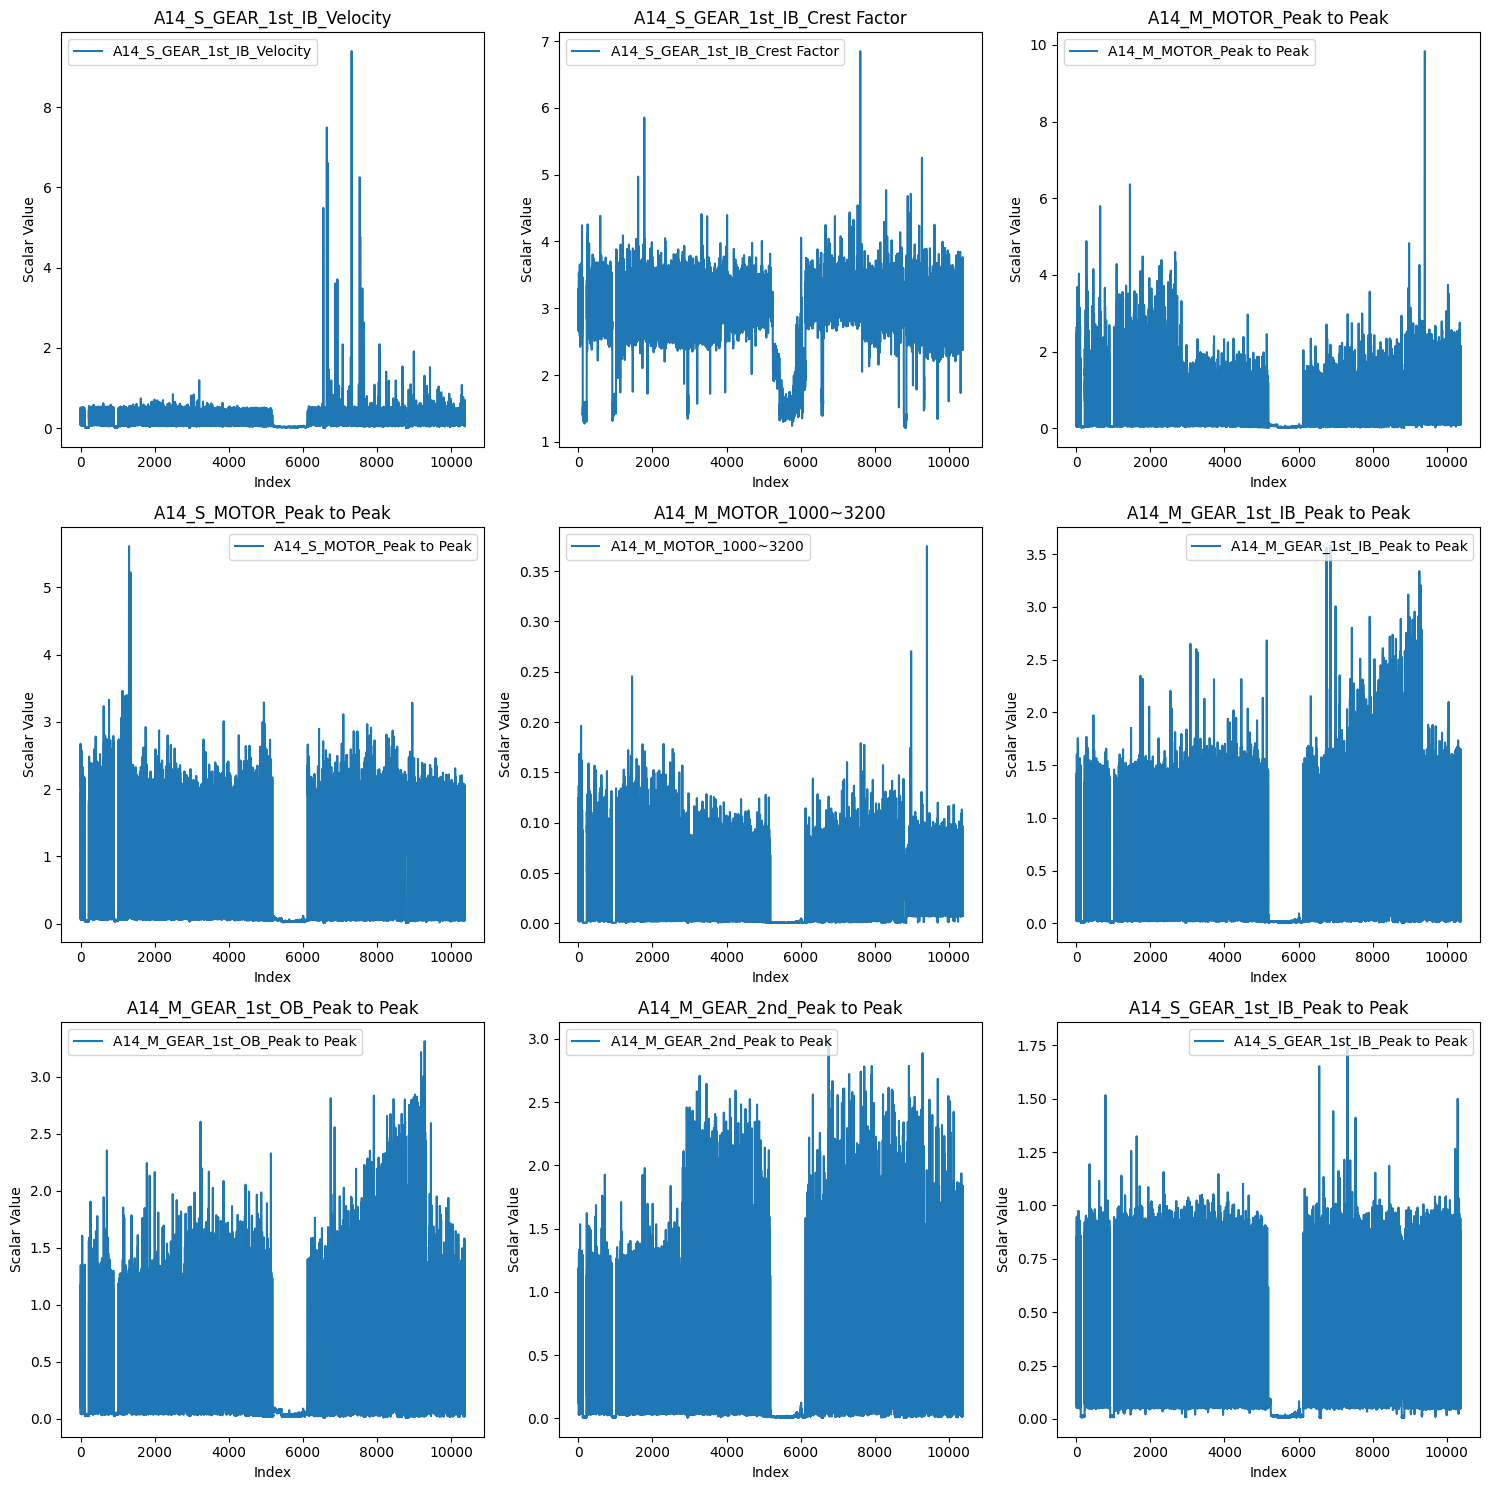

In [10]:
import matplotlib.pyplot as plt

# Setup the dimensions for each subplot figure
plots_per_figure = 9  # This is the number of plots per figure
subplot_index = 1
figure_number = 1

# Create the first figure
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

for i, df_list in enumerate(df_lists):
    for df in df_list:
        if df["PointName"][0] == "A6_M_GEAR_2nd" and df["Type"][0] == "Acceleration":
                hi = df
        # When subplot index exceeds the plots per figure, create a new figure
        if subplot_index > plots_per_figure:
            plt.tight_layout()
            plt.show()
            
            # Increment the figure number and reset subplot index
            figure_number += 1
            subplot_index = 1
            
            # Create a new figure
            plt.figure(figure_number, figsize=(15, 15))
        
        # Make sure DataFrame has the required columns
    
        if "Scalar" in df.columns and "PointName" in df.columns and "Type" in df.columns:
            # Create a subplot for each DataFrame
            
            plt.subplot(3, 3, subplot_index)  # 3x3 subplots per figure
            plt.plot(df["Scalar"], label=f'{df["PointName"].iloc[0]}_{df["Type"].iloc[0]}')
            
            # Adding title and labels
            plt.title(f'{df["PointName"].iloc[0]}_{df["Type"].iloc[0]}')
            plt.xlabel('Index')  # Assuming the x-axis represents some index
            plt.ylabel('Scalar Value')
            plt.legend()
            
            # Increment subplot index
            subplot_index += 1
        else:
            print(f"DataFrame at df_lists[{i}][{j}] does not have the required columns.")

# Finalize the last figure
plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import savgol_filter

def calculate_rms(input):
    input = input.reshape(-1,1)#make input 1D array
    """
    input : signal, 1D array

    Do: calculate rms for input 
    """
    return np.sqrt(np.mean(input**2))


def calculate_rms_after_waverec(signal, mode = 'per', wavelet = 'db4'):
    level = 4
    signal = signal.reshape(-1)#make signal 1D array
    """
    mode와 wavelet은 수정해도 되지만, level을 변경할 경우 코드를 이 함수의 코드를 수정해야함.

    input : signal, 1D array ex) (8192,)
    output = concatenated_reconstructed, 1D numpy array of shape (16,)
    
    Do: 입력신호에 대하여 multi-level DWT 수행한 후, 16가지 방법으로 복원하고, 각 방법으로 복원한 신호의 rms를 계산한다.
    """

    # multi-level DWT 수행
    coeffs = pywt.wavedec(signal, wavelet, mode, level)
    # DWT 결과 출력
    cA4, cD4, cD3, cD2, cD1  = coeffs

    # multi-level DWT 결과를 이용하여 원래 신호를 총 16가지 방법으로 복원함 

    reconstructed_lv0_rms = calculate_rms(pywt.waverec([cA4, None, None, None, None], wavelet='db4',mode="per")).reshape(-1,1)

    reconstructed_lv1_1_rms = calculate_rms(pywt.waverec([cA4, cD4, None, None, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv1_2_rms = calculate_rms(pywt.waverec([cA4, None, cD3, None, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv1_3_rms = calculate_rms(pywt.waverec([cA4, None, None, cD2, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv1_4_rms = calculate_rms(pywt.waverec([cA4, None, None, None, cD1], wavelet='db4',mode="per")).reshape(-1,1)

    reconstructed_lv2_1_rms = calculate_rms(pywt.waverec([cA4, cD4, cD3, None, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv2_2_rms = calculate_rms(pywt.waverec([cA4, cD4, None, cD2, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv2_3_rms = calculate_rms(pywt.waverec([cA4, cD4, None, None, cD1], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv2_4_rms = calculate_rms(pywt.waverec([cA4, None, cD3, cD2, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv2_5_rms = calculate_rms(pywt.waverec([cA4, None, cD3, None, cD1], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv2_6_rms = calculate_rms(pywt.waverec([cA4, None, None, cD2, cD1], wavelet='db4',mode="per")).reshape(-1,1)

    reconstructed_lv3_1_rms = calculate_rms(pywt.waverec([cA4, cD4, cD3, cD2, None], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv3_2_rms = calculate_rms(pywt.waverec([cA4, cD4, cD3, None, cD1], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv3_3_rms = calculate_rms(pywt.waverec([cA4, cD4, None, cD2, cD1], wavelet='db4',mode="per")).reshape(-1,1)
    reconstructed_lv3_4_rms = calculate_rms(pywt.waverec([cA4, None, cD3, cD2, cD1], wavelet='db4',mode="per")).reshape(-1,1)


    reconstructed_lv4_rms = calculate_rms(pywt.waverec([cA4, cD4, cD3, cD2, cD1], wavelet='db4',mode="per")).reshape(-1,1)

    concatenated_reconstructed = np.concatenate([reconstructed_lv0_rms,
                                                 reconstructed_lv1_1_rms,reconstructed_lv1_2_rms,reconstructed_lv1_3_rms,reconstructed_lv1_4_rms,
                                                 reconstructed_lv2_1_rms, reconstructed_lv2_2_rms, reconstructed_lv2_3_rms, reconstructed_lv2_4_rms, reconstructed_lv2_5_rms, reconstructed_lv2_6_rms,
                                                 reconstructed_lv3_1_rms, reconstructed_lv3_2_rms, reconstructed_lv3_3_rms, reconstructed_lv3_4_rms,
                                                 reconstructed_lv4_rms],axis = 1)

    return concatenated_reconstructed

def make_sub_band_rms_list(list_of_list):
    """
    input : list_of_list, list of list ex) [[1D arr,1D arr,....], [1D arr,1D arr,....], [1D arr,1D arr,....], ...]
    output = concatenated_reconstructed, list of 1D numpy array that has shape (16,) ex) [1D arr,1D arr,....]

    Do: 입력 신호가 저장된 list of 1D arr 의 list를 받아서
    입력신호에 대하여 multi-level DWT 수행한 후, 16가지 방법으로 복원하고, 각 방법으로 복원한 신호의 rms를 계산한다.
    """
    output_list = []
    for i in range(len(list_of_list)):
        output_list.append(calculate_rms_after_waverec(list_of_list[i]))

    return output_list


def make_health_indicator(sub_band_rms_arr, window = 100, poly = 3):
    """
    input
    window, poly를 조정하여 마음대로 써도됨, savgol_filter는 단지 스무딩을 위한 방법이므로 바꾸어도 무관
    Do: make_sub_band_rms_list의 16가지 결과물을 스무딩하고, 이 결과들을 종합하여 하나의 health index를 뽑는다.
    """
    max_diff_sub_band_rms_list = []
    smoothed_sub_band_rms_arr =  savgol_filter(sub_band_rms_arr, window, poly, mode='nearest',axis= 0)

    for i in range(len(smoothed_sub_band_rms_arr)):
        max_diff = 0
        if i == 0:
            #max_diff_sub_band_rms_list.append(np.max(smoothed_sub_band_rms_arr[i,:]))
            max_diff_sub_band_rms_list.append(max_diff)
        else:
            for j in range(smoothed_sub_band_rms_arr.shape[1]):
                diff = smoothed_sub_band_rms_arr[i,j] - smoothed_sub_band_rms_arr[i-1,j]
                if diff > max_diff:
                    max_diff = diff
            max_diff_sub_band_rms_list.append(max_diff_sub_band_rms_list[i-1] + max_diff)

    return max_diff_sub_band_rms_list

def health_indicator_to_heatlh_index(health_indicator):
    """
    Do: make health_indicator 1D numpy array and transfer it specific logic 
    """
    health_index = health_index_logic(np.array(health_indicator))
    return  health_index

def health_index_logic(arr):
    """
    input: arr(1D array)
    output: arr(1D array)
    """
    return np.power((1 / (arr + 1)),8)

In [12]:
hi

Idx  MeasureId    Scalar                 DateTime  ChannelId  \
0       72882397        389  0.123680  2021-06-20 00:36:08.000        150   
1       72884788        389  0.198091  2021-06-20 01:17:32.000        150   
2       72887179        389  0.208058  2021-06-20 01:57:10.000        150   
3       72889570        389  0.004726  2021-06-20 02:36:42.000        150   
4       72891961        389  0.064567  2021-06-20 03:16:49.000        150   
...          ...        ...       ...                      ...        ...   
12379  100577003        389  0.982249  2022-06-14 13:20:35.000        150   
12380  100579228        389  0.946214  2022-06-14 14:00:46.000        150   
12381  100581476        389  0.084257  2022-06-14 14:40:47.000        150   
12382  100583689        389  0.251206  2022-06-14 15:21:02.000        150   
12383  100585914        389  0.087290  2022-06-14 16:01:09.000        150   

               Type      PointName  ModuleId       ModuleName  Integral  \
0      Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
1      Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
2      Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
3      Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
4      Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
...             ...            ...       ...              ...       ...   
12379  Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
12380  Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
12381  Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
12382  Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   
12383  Acceleration  A6_M_GEAR_2nd        14  Module14(IP 81)         0   

       MeasureType  BandLow  BandHigh  
0                0     10.0    3200.0  
1                0     10.0    3200.0  
2                0     10.0    3200.0  
3                0     10.0    3200.0  
4                0     10.0    3200.0  
...            ...      ...       ...  
12379            0     10.0    3200.0  
12380            0     10.0    3200.0  
12381            0     10.0    3200.0  
12382            0     10.0    3200.0  
12383            0     10.0    3200.0  

[12384 rows x 13 columns]